Objectives

1.	Apply various classification algorithms to the movie reviews dataset
2.	Use k-fold cross validation to identify the parameters that optimize performance (generalization) for each method
3.	Compare the accuracy and explainability of each method



Problem #1
For this homework, you will apply the following classification methods to the movie reviews classification data (available in Blackboard)
1.	KNN (vary the distance measure and K)
2.	Multinomial Naïve Bayes
3.	Random Forest
4.	Gradient Boosted Regression Trees

•	Apply 4-fold cross-validation to the provided training data subset to train your classifiers and identify their optimal parameters. 
•	You need to apply each algorithm to the original data and to the data normalized using at least 2 different methods. For each algorithm identify the best normalization (or no normalization) and justify your choice.

•	After fixing the classifiers’ parameters, apply each method to the provided testing data subset to predict and analyze your results. Compare the accuracy obtained during training (average of the cross-validation folds) to those of the test data and comment on the results (overfitting, underfitting, etc.) 
•	Analyze the results of each method by inspecting the feature importance (if applicable) and few misclassified samples.
•	Select the best algorithm and justify your choice based on accuracy, explainability, time required to train/test, etc.


In [3]:
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score,  classification_report

In [4]:
X_train = pd.read_csv('~/Desktop/Machine_Learning/IMDB dataset/X_train.csv')
X_test = pd.read_csv('~/Desktop/Machine_Learning/IMDB dataset/X_test.csv')
y_train = pd.read_csv('~/Desktop/Machine_Learning/IMDB dataset/y_train.csv').values.ravel()
y_test = pd.read_csv('~/Desktop/Machine_Learning/IMDB dataset/y_test.csv').values.ravel()

In [5]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (24999, 1000)
X_test shape: (24999, 1000)
y_train shape: (24999,)
y_test shape: (24999,)


In [47]:
print(X_train.head())

   0.0  1.0  1.0.1  0.0.1  1.0.2  1.0.3  1.0.4  1.0.5  1.0.6  1.0.7  ...  \
0  0.0  1.0    1.0    0.0    1.0    1.0    1.0    1.0    1.0    1.0  ...   
1  0.0  1.0    1.0    0.0    1.0    0.0    1.0    1.0    1.0    1.0  ...   
2  0.0  1.0    1.0    0.0    1.0    1.0    1.0    1.0    1.0    1.0  ...   
3  0.0  1.0    1.0    0.0    1.0    1.0    1.0    1.0    1.0    0.0  ...   
4  0.0  1.0    1.0    0.0    1.0    0.0    0.0    0.0    1.0    0.0  ...   

   0.0.893  0.0.894  0.0.895  0.0.896  0.0.897  0.0.898  0.0.899  0.0.900  \
0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
1      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
2      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
3      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
4      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   

   0.0.901  0.0.902  
0      0.0      0.0  
1      0.0      0.0  
2      0.0    

In [7]:
print(y_train[:5])

[0. 0. 1. 0. 0.]


In [48]:
print(X_test.head())

   0.0  1.0  1.0.1  0.0.1  1.0.2  1.0.3  1.0.4  1.0.5  1.0.6  1.0.7  ...  \
0  0.0  1.0    1.0    0.0    1.0    1.0    1.0    1.0    1.0    1.0  ...   
1  0.0  1.0    1.0    0.0    1.0    1.0    1.0    1.0    1.0    1.0  ...   
2  0.0  1.0    1.0    0.0    1.0    1.0    1.0    1.0    1.0    1.0  ...   
3  0.0  1.0    1.0    0.0    1.0    1.0    1.0    0.0    1.0    1.0  ...   
4  0.0  1.0    1.0    0.0    1.0    1.0    1.0    0.0    1.0    1.0  ...   

   0.0.948  0.0.949  0.0.950  0.0.951  0.0.952  0.0.953  0.0.954  0.0.955  \
0      1.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
1      0.0      0.0      0.0      1.0      0.0      0.0      0.0      1.0   
2      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
3      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
4      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   

   0.0.956  0.0.957  
0      0.0      0.0  
1      0.0      1.0  
2      0.0    

In [46]:
print(y_test[:5])

[1. 1. 0. 1. 1.]


In [8]:
kf = KFold(n_splits=4, shuffle=True, random_state=42)

KNN (vary the distance measure and K)

In [9]:
k_values = [1, 3, 5, 7, 9]

In [10]:
all_fold_accuracies = {}  
avg_accuracies = []
execution_times = []


In [11]:
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    fold_accuracies = []
    
    start_time = time.time() 
    
    
    for train_index, val_index in kf.split(X_train):
        X_fold_train, X_fold_val = X_train.iloc[train_index], X_train.iloc[val_index]
       
        y_fold_train, y_fold_val = y_train[train_index], y_train[val_index]
        
       
        knn.fit(X_fold_train, y_fold_train)
        y_pred = knn.predict(X_fold_val)
        accuracy = accuracy_score(y_fold_val, y_pred)
        fold_accuracies.append(accuracy) 
    
    avg_accuracy = sum(fold_accuracies) / len(fold_accuracies)  
    avg_accuracies.append(avg_accuracy)  
    
    elapsed_time = time.time() - start_time  
    execution_times.append(elapsed_time)  
    
    all_fold_accuracies[k] = fold_accuracies 

    
    print(f"KNN with K={k}: Average CV accuracy = {avg_accuracy:.4f}, Time taken = {elapsed_time:.2f} seconds")


KNN with K=1: Average CV accuracy = 0.5949, Time taken = 5.77 seconds
KNN with K=3: Average CV accuracy = 0.6205, Time taken = 5.46 seconds
KNN with K=5: Average CV accuracy = 0.6292, Time taken = 5.56 seconds
KNN with K=7: Average CV accuracy = 0.6352, Time taken = 5.59 seconds
KNN with K=9: Average CV accuracy = 0.6344, Time taken = 5.70 seconds


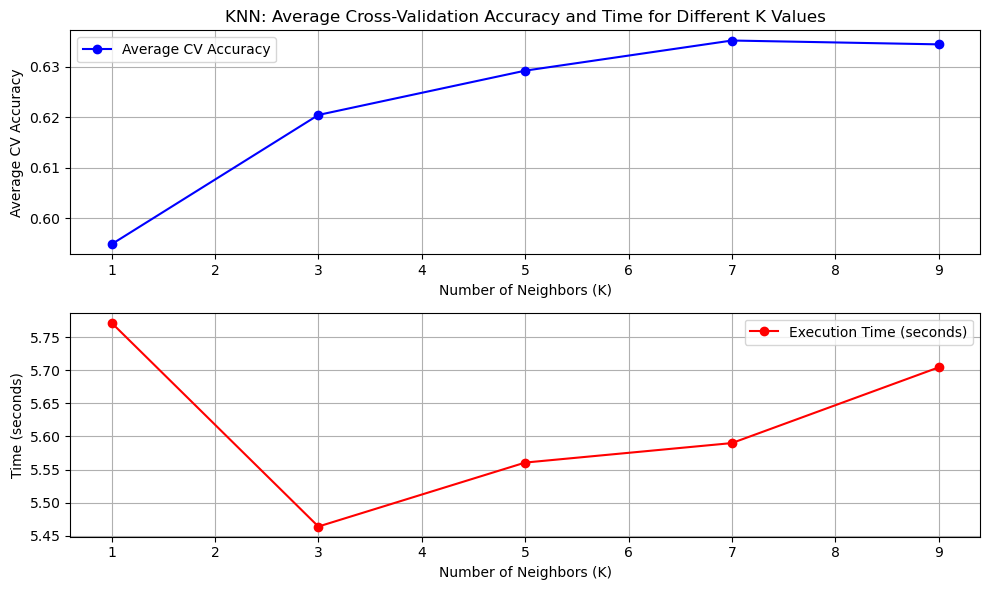

In [12]:
plt.figure(figsize=(10, 6))


plt.subplot(2, 1, 1)
plt.plot(k_values, avg_accuracies, marker='o', linestyle='-', color='b', label='Average CV Accuracy')
plt.title('KNN: Average Cross-Validation Accuracy and Time for Different K Values')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Average CV Accuracy')
plt.grid(True)
plt.legend()


plt.subplot(2, 1, 2)
plt.plot(k_values, execution_times, marker='o', linestyle='-', color='r', label='Execution Time (seconds)')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Time (seconds)')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()






KNN with K=1: Average CV accuracy = 0.5949, Average Training accuracy = 1.0000, Time taken = 21.46 seconds
KNN with K=3: Average CV accuracy = 0.6205, Average Training accuracy = 0.8068, Time taken = 23.49 seconds
KNN with K=5: Average CV accuracy = 0.6292, Average Training accuracy = 0.7601, Time taken = 24.66 seconds
KNN with K=7: Average CV accuracy = 0.6352, Average Training accuracy = 0.7367, Time taken = 24.19 seconds
KNN with K=9: Average CV accuracy = 0.6344, Average Training accuracy = 0.7186, Time taken = 24.45 seconds


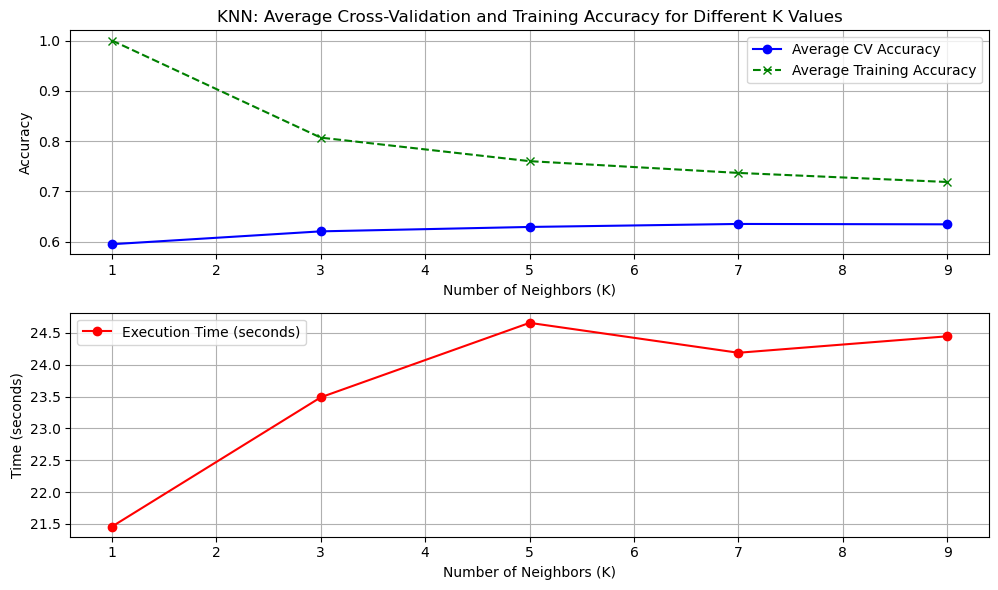

In [13]:
k_values = [1, 3, 5, 7, 9]
all_fold_accuracies = {}  
all_train_accuracies = {}
avg_accuracies = []
avg_train_accuracies = []
execution_times = []

kf = KFold(n_splits=4, shuffle=True, random_state=42)


for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    fold_accuracies = []
    fold_train_accuracies = []  
    
    start_time = time.time()  
    
    
    for train_index, val_index in kf.split(X_train):
        X_fold_train, X_fold_val = X_train.iloc[train_index], X_train.iloc[val_index]
        y_fold_train, y_fold_val = y_train[train_index], y_train[val_index]
        
       
        knn.fit(X_fold_train, y_fold_train)
        
       
        y_val_pred = knn.predict(X_fold_val)
        accuracy = accuracy_score(y_fold_val, y_val_pred)
        fold_accuracies.append(accuracy)  
        
       
        y_train_pred = knn.predict(X_fold_train)
        train_accuracy = accuracy_score(y_fold_train, y_train_pred)
        fold_train_accuracies.append(train_accuracy)  
    
    avg_accuracy = sum(fold_accuracies) / len(fold_accuracies)  
    avg_train_accuracy = sum(fold_train_accuracies) / len(fold_train_accuracies)  
    avg_accuracies.append(avg_accuracy) 
    avg_train_accuracies.append(avg_train_accuracy)  
    
    elapsed_time = time.time() - start_time  
    execution_times.append(elapsed_time) 

    all_fold_accuracies[k] = fold_accuracies  
    all_train_accuracies[k] = fold_train_accuracies  


    print(f"KNN with K={k}: Average CV accuracy = {avg_accuracy:.4f}, Average Training accuracy = {avg_train_accuracy:.4f}, Time taken = {elapsed_time:.2f} seconds")





plt.figure(figsize=(10, 6))


plt.subplot(2, 1, 1)
plt.plot(k_values, avg_accuracies, marker='o', linestyle='-', color='b', label='Average CV Accuracy')
plt.plot(k_values, avg_train_accuracies, marker='x', linestyle='--', color='g', label='Average Training Accuracy')
plt.title('KNN: Average Cross-Validation and Training Accuracy for Different K Values')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()


plt.subplot(2, 1, 2)
plt.plot(k_values, execution_times, marker='o', linestyle='-', color='r', label='Execution Time (seconds)')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Time (seconds)')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()










KNN with K=1, Metric=euclidean: Average CV accuracy = 0.5949, Average Training accuracy = 1.0000, Time taken = 24.38 seconds
KNN with K=3, Metric=euclidean: Average CV accuracy = 0.6205, Average Training accuracy = 0.8068, Time taken = 24.84 seconds
KNN with K=5, Metric=euclidean: Average CV accuracy = 0.6292, Average Training accuracy = 0.7601, Time taken = 25.49 seconds
KNN with K=7, Metric=euclidean: Average CV accuracy = 0.6352, Average Training accuracy = 0.7367, Time taken = 26.51 seconds
KNN with K=9, Metric=euclidean: Average CV accuracy = 0.6344, Average Training accuracy = 0.7186, Time taken = 25.55 seconds


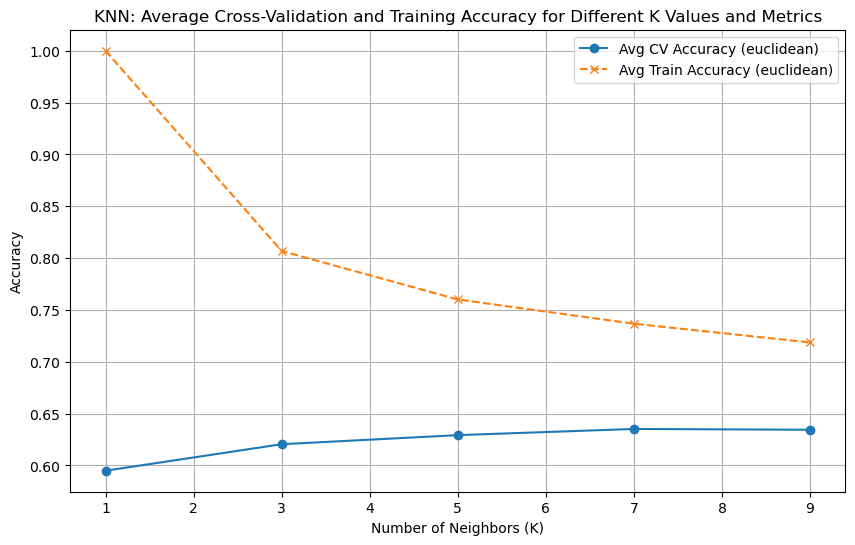

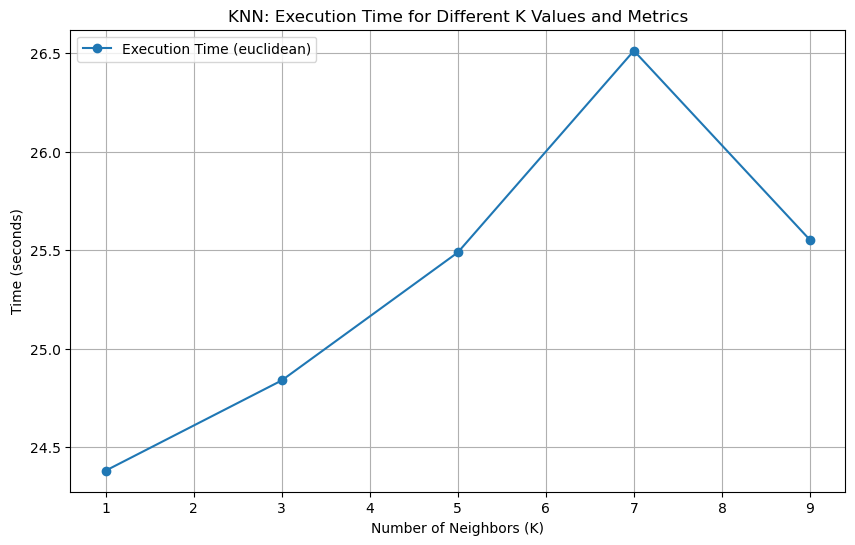

In [14]:
k_values = [1, 3, 5, 7, 9]
metrics = ['euclidean']  
all_results = {}

kf = KFold(n_splits=4, shuffle=True, random_state=42)

for metric in metrics:
    avg_accuracies = []
    avg_train_accuracies = []
    execution_times = []  

    for k in k_values:
        knn = KNeighborsClassifier(n_neighbors=k, metric=metric, n_jobs=-1)  
        fold_accuracies = []
        fold_train_accuracies = []

        start_time = time.time() 

        for train_index, val_index in kf.split(X_train):
            X_fold_train, X_fold_val = X_train.iloc[train_index], X_train.iloc[val_index]
            y_fold_train, y_fold_val = y_train[train_index], y_train[val_index]
            
            knn.fit(X_fold_train, y_fold_train)
            y_val_pred = knn.predict(X_fold_val)
            accuracy = accuracy_score(y_fold_val, y_val_pred)
            fold_accuracies.append(accuracy)
            
            y_train_pred = knn.predict(X_fold_train)
            train_accuracy = accuracy_score(y_fold_train, y_train_pred)
            fold_train_accuracies.append(train_accuracy)
        
        avg_accuracy = sum(fold_accuracies) / len(fold_accuracies)
        avg_train_accuracy = sum(fold_train_accuracies) / len(fold_train_accuracies)
        avg_accuracies.append(avg_accuracy)
        avg_train_accuracies.append(avg_train_accuracy)

        execution_time = time.time() - start_time  
        execution_times.append(execution_time) 

        print(f"KNN with K={k}, Metric={metric}: Average CV accuracy = {avg_accuracy:.4f}, Average Training accuracy = {avg_train_accuracy:.4f}, Time taken = {execution_time:.2f} seconds")

    all_results[metric] = {
        'avg_accuracies': avg_accuracies,
        'avg_train_accuracies': avg_train_accuracies,
        'execution_times': execution_times 
    }


plt.figure(figsize=(10, 6))

for metric in metrics:
    plt.plot(k_values, all_results[metric]['avg_accuracies'], marker='o', linestyle='-', label=f'Avg CV Accuracy ({metric})')
    plt.plot(k_values, all_results[metric]['avg_train_accuracies'], marker='x', linestyle='--', label=f'Avg Train Accuracy ({metric})')

plt.title('KNN: Average Cross-Validation and Training Accuracy for Different K Values and Metrics')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()
plt.show()


plt.figure(figsize=(10, 6))
plt.plot(k_values, all_results[metric]['execution_times'], marker='o', linestyle='-', label=f'Execution Time ({metric})')
plt.title('KNN: Execution Time for Different K Values and Metrics')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Time (seconds)')
plt.grid(True)
plt.legend()
plt.show()

In [15]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [16]:
minmax_scaler = MinMaxScaler()
standard_scaler = StandardScaler()


X_train_minmax = minmax_scaler.fit_transform(X_train.values)  
X_train_standard = standard_scaler.fit_transform(X_train.values)  

In [17]:
k_values = [1, 3, 5, 7, 9]
metrics = ['euclidean']  
all_results = {}


kf = KFold(n_splits=4, shuffle=True, random_state=42)

def evaluate_knn(X, y):
    for metric in metrics:
        avg_accuracies = []
        avg_train_accuracies = []

        for k in k_values:
            knn = KNeighborsClassifier(n_neighbors=k, metric=metric, n_jobs=-1)
            fold_accuracies = []
            fold_train_accuracies = []

            for train_index, val_index in kf.split(X):
                X_fold_train, X_fold_val = X[train_index], X[val_index]
                y_fold_train, y_fold_val = y[train_index], y[val_index]
                
                knn.fit(X_fold_train, y_fold_train)
                y_val_pred = knn.predict(X_fold_val)
                accuracy = accuracy_score(y_fold_val, y_val_pred)
                fold_accuracies.append(accuracy)
                
                y_train_pred = knn.predict(X_fold_train)
                train_accuracy = accuracy_score(y_fold_train, y_train_pred)
                fold_train_accuracies.append(train_accuracy)

            avg_accuracy = sum(fold_accuracies) / len(fold_accuracies)
            avg_train_accuracy = sum(fold_train_accuracies) / len(fold_train_accuracies)
            avg_accuracies.append(avg_accuracy)
            avg_train_accuracies.append(avg_train_accuracy)

            print(f"KNN with K={k}, Metric={metric}: Average CV accuracy = {avg_accuracy:.4f}, Average Training accuracy = {avg_train_accuracy:.4f}")

        all_results[metric] = {
            'avg_accuracies': avg_accuracies,
            'avg_train_accuracies': avg_train_accuracies,
        }


X_train_minmax = minmax_scaler.fit_transform(X_train.values)
X_train_standard = standard_scaler.fit_transform(X_train.values)


print("Results for unscaled data:")
evaluate_knn(X_train.values, y_train)

print("\nResults for Min-Max scaled data:")
evaluate_knn(X_train_minmax, y_train)

print("\nResults for Standardized data:")
evaluate_knn(X_train_standard, y_train)


Results for unscaled data:
KNN with K=1, Metric=euclidean: Average CV accuracy = 0.5949, Average Training accuracy = 1.0000
KNN with K=3, Metric=euclidean: Average CV accuracy = 0.6205, Average Training accuracy = 0.8068
KNN with K=5, Metric=euclidean: Average CV accuracy = 0.6292, Average Training accuracy = 0.7601
KNN with K=7, Metric=euclidean: Average CV accuracy = 0.6352, Average Training accuracy = 0.7367
KNN with K=9, Metric=euclidean: Average CV accuracy = 0.6344, Average Training accuracy = 0.7186

Results for Min-Max scaled data:
KNN with K=1, Metric=euclidean: Average CV accuracy = 0.5949, Average Training accuracy = 1.0000
KNN with K=3, Metric=euclidean: Average CV accuracy = 0.6205, Average Training accuracy = 0.8068
KNN with K=5, Metric=euclidean: Average CV accuracy = 0.6292, Average Training accuracy = 0.7601
KNN with K=7, Metric=euclidean: Average CV accuracy = 0.6352, Average Training accuracy = 0.7367
KNN with K=9, Metric=euclidean: Average CV accuracy = 0.6344, Aver

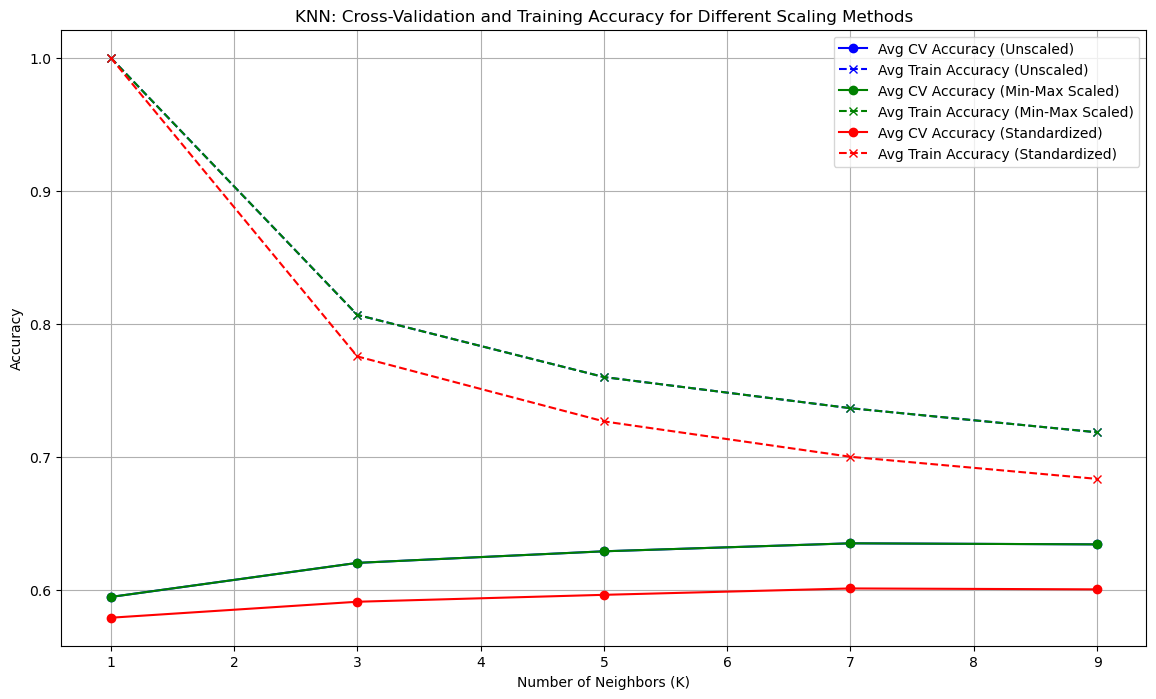

In [18]:
k_values = [1, 3, 5, 7, 9]

results = {
    'Unscaled': {
        'avg_cv_accuracy': [0.5949, 0.6205, 0.6292, 0.6352, 0.6344],
        'avg_train_accuracy': [1.0000, 0.8068, 0.7601, 0.7367, 0.7186]
    },
    'Min-Max Scaled': {
        'avg_cv_accuracy': [0.5949, 0.6205, 0.6292, 0.6352, 0.6344],
        'avg_train_accuracy': [1.0000, 0.8068, 0.7601, 0.7367, 0.7186]
    },
    'Standardized': {
        'avg_cv_accuracy': [0.5793, 0.5913, 0.5965, 0.6013, 0.6006],
        'avg_train_accuracy': [1.0000, 0.7756, 0.7268, 0.7002, 0.6836]
    }
}


plt.figure(figsize=(14, 8))

plt.plot(k_values, results['Unscaled']['avg_cv_accuracy'], marker='o', linestyle='-', color='b', label='Avg CV Accuracy (Unscaled)')
plt.plot(k_values, results['Unscaled']['avg_train_accuracy'], marker='x', linestyle='--', color='b', label='Avg Train Accuracy (Unscaled)')

plt.plot(k_values, results['Min-Max Scaled']['avg_cv_accuracy'], marker='o', linestyle='-', color='g', label='Avg CV Accuracy (Min-Max Scaled)')
plt.plot(k_values, results['Min-Max Scaled']['avg_train_accuracy'], marker='x', linestyle='--', color='g', label='Avg Train Accuracy (Min-Max Scaled)')

plt.plot(k_values, results['Standardized']['avg_cv_accuracy'], marker='o', linestyle='-', color='r', label='Avg CV Accuracy (Standardized)')
plt.plot(k_values, results['Standardized']['avg_train_accuracy'], marker='x', linestyle='--', color='r', label='Avg Train Accuracy (Standardized)')

plt.title('KNN: Cross-Validation and Training Accuracy for Different Scaling Methods')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()
plt.show()

Multinomial Naïve Bayes

Evaluating Multinomial Naive Bayes with unscaled data:
Multinomial Naive Bayes with alpha=0.01: Average CV accuracy = 0.8323, Training accuracy = 0.8357, Time taken = 0.48 seconds
Multinomial Naive Bayes with alpha=0.1: Average CV accuracy = 0.8323, Training accuracy = 0.8357, Time taken = 0.42 seconds
Multinomial Naive Bayes with alpha=1: Average CV accuracy = 0.8322, Training accuracy = 0.8357, Time taken = 0.41 seconds
Multinomial Naive Bayes with alpha=10: Average CV accuracy = 0.8323, Training accuracy = 0.8355, Time taken = 0.41 seconds
Multinomial Naive Bayes with alpha=100: Average CV accuracy = 0.8295, Training accuracy = 0.8342, Time taken = 0.44 seconds


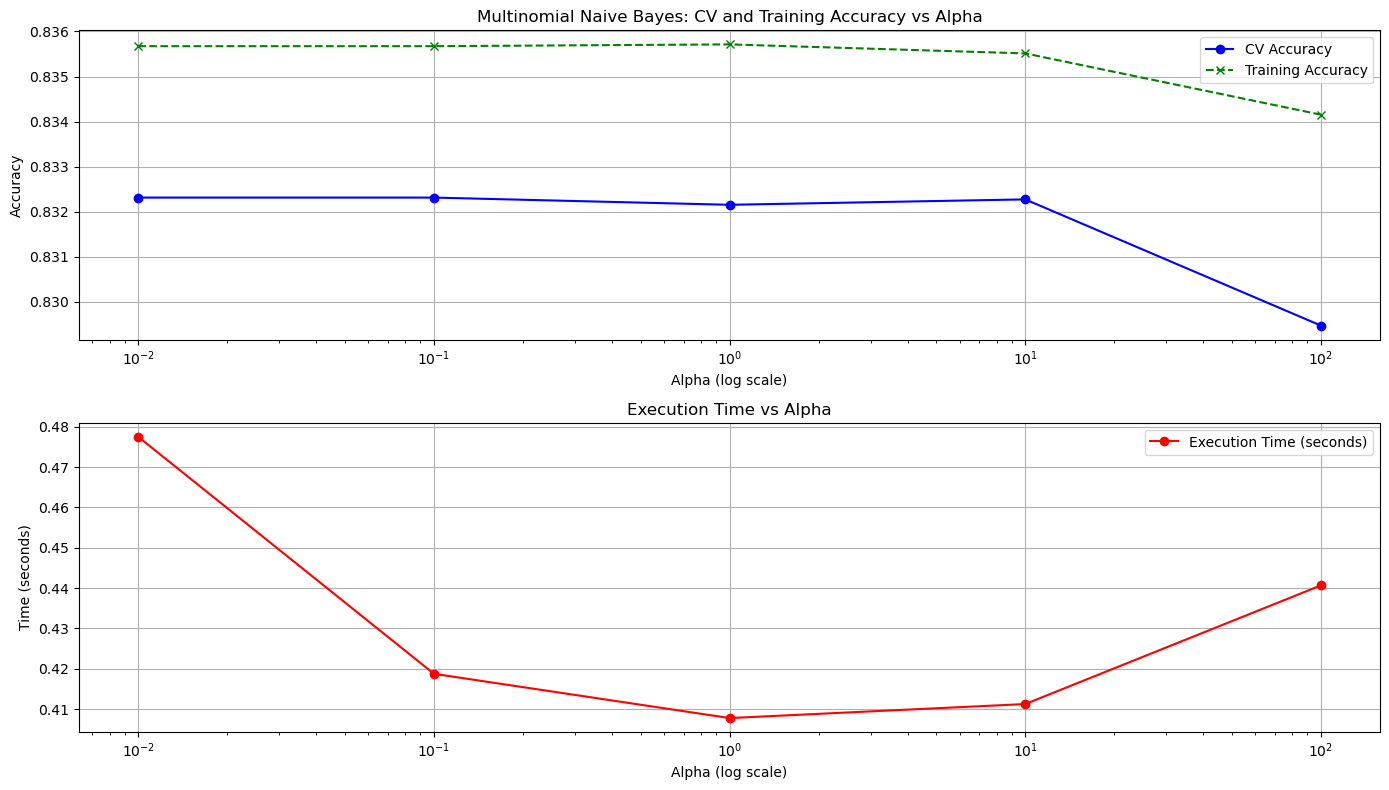

In [19]:
alpha_values = [0.01, 0.1, 1, 10, 100]
kf = KFold(n_splits=4, shuffle=True, random_state=42)


results = {
    'alpha': alpha_values,
    'cv_accuracy': [],
    'train_accuracy': [],
    'execution_time': []
}


def evaluate_mnb(X, y, alpha_values):
    for alpha in alpha_values:
        mnb = MultinomialNB(alpha=alpha)
        
    
        start_time = time.time()
        
     
        cv_scores = cross_val_score(mnb, X, y, cv=kf, scoring='accuracy')
        
       
        elapsed_time = time.time() - start_time
        
        avg_cv_accuracy = np.mean(cv_scores)  
        

        mnb.fit(X, y)
        train_accuracy = mnb.score(X, y)

      
        results['cv_accuracy'].append(avg_cv_accuracy)
        results['train_accuracy'].append(train_accuracy)
        results['execution_time'].append(elapsed_time)

        print(f"Multinomial Naive Bayes with alpha={alpha}: "
              f"Average CV accuracy = {avg_cv_accuracy:.4f}, "
              f"Training accuracy = {train_accuracy:.4f}, "
              f"Time taken = {elapsed_time:.2f} seconds")


print("Evaluating Multinomial Naive Bayes with unscaled data:")
evaluate_mnb(X_train.values, y_train, alpha_values)


plt.figure(figsize=(14, 8))


plt.subplot(2, 1, 1)
plt.plot(results['alpha'], results['cv_accuracy'], marker='o', linestyle='-', color='b', label='CV Accuracy')
plt.plot(results['alpha'], results['train_accuracy'], marker='x', linestyle='--', color='g', label='Training Accuracy')
plt.xscale('log')
plt.title('Multinomial Naive Bayes: CV and Training Accuracy vs Alpha')
plt.xlabel('Alpha (log scale)')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()


plt.subplot(2, 1, 2)
plt.plot(results['alpha'], results['execution_time'], marker='o', linestyle='-', color='r', label='Execution Time (seconds)')
plt.xscale('log')
plt.title('Execution Time vs Alpha')
plt.xlabel('Alpha (log scale)')
plt.ylabel('Time (seconds)')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

Evaluating Multinomial Naive Bayes with unscaled data:
Multinomial Naive Bayes with alpha=0.01: Average CV accuracy = 0.8323, Training accuracy = 0.8357, Time taken = 0.41 seconds
Multinomial Naive Bayes with alpha=0.1: Average CV accuracy = 0.8323, Training accuracy = 0.8357, Time taken = 0.40 seconds
Multinomial Naive Bayes with alpha=1: Average CV accuracy = 0.8322, Training accuracy = 0.8357, Time taken = 0.39 seconds
Multinomial Naive Bayes with alpha=10: Average CV accuracy = 0.8323, Training accuracy = 0.8355, Time taken = 0.40 seconds
Multinomial Naive Bayes with alpha=100: Average CV accuracy = 0.8295, Training accuracy = 0.8342, Time taken = 0.43 seconds
Evaluating Multinomial Naive Bayes with Min-Max scaled data:
Multinomial Naive Bayes with alpha=0.01: Average CV accuracy = 0.8322, Training accuracy = 0.8355, Time taken = 0.42 seconds
Multinomial Naive Bayes with alpha=0.1: Average CV accuracy = 0.8322, Training accuracy = 0.8355, Time taken = 0.59 seconds
Multinomial Naive

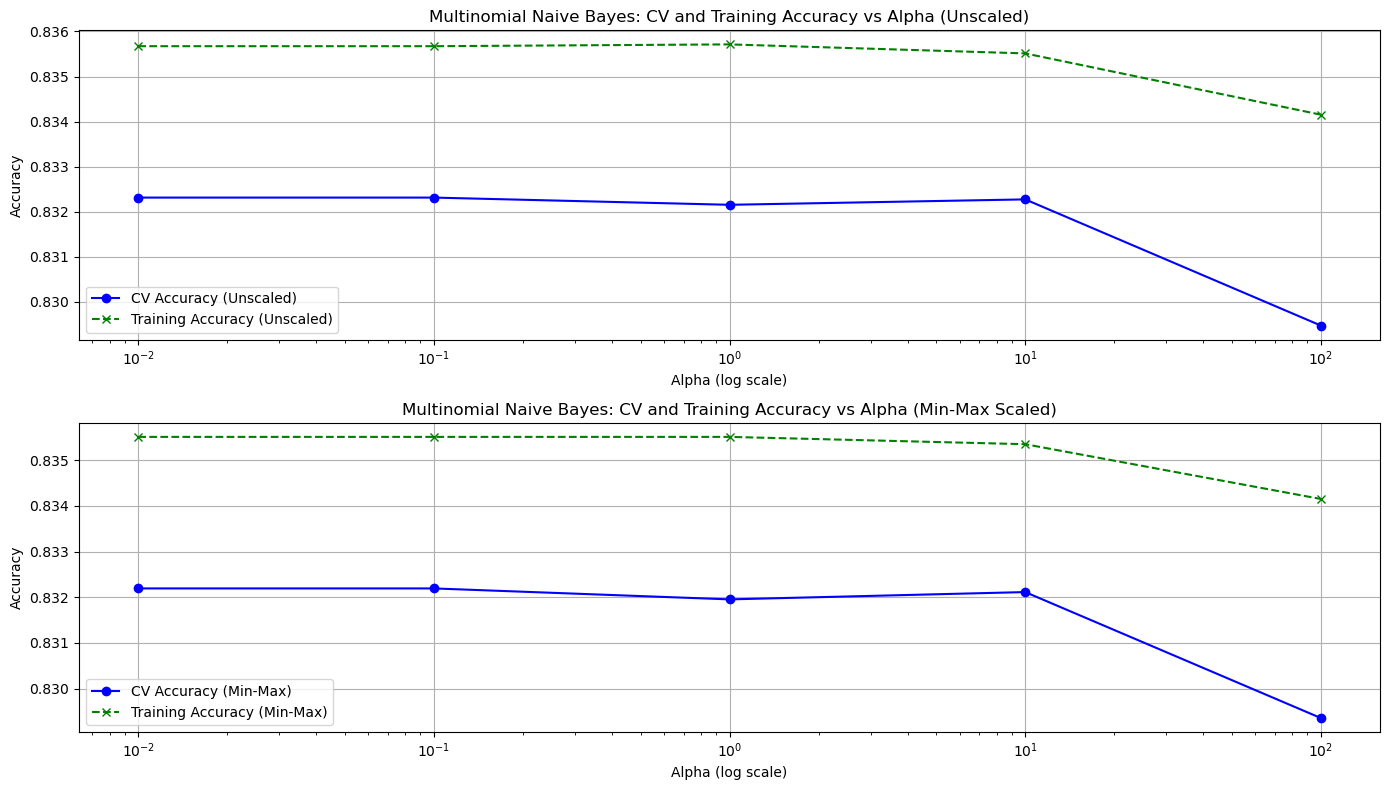

In [20]:

minmax_scaler = MinMaxScaler()


alpha_values = [0.01, 0.1, 1, 10, 100]
kf = KFold(n_splits=4, shuffle=True, random_state=42)

def evaluate_mnb(X, y, alpha_values):
    results = {
        'alpha': alpha_values,
        'cv_accuracy': [],
        'train_accuracy': [],
        'execution_time': []
    }

    for alpha in alpha_values:
        mnb = MultinomialNB(alpha=alpha)

        start_time = time.time()
        cv_scores = cross_val_score(mnb, X, y, cv=kf, scoring='accuracy')
        elapsed_time = time.time() - start_time

        avg_cv_accuracy = np.mean(cv_scores)  
        mnb.fit(X, y)
        train_accuracy = mnb.score(X, y)

        results['cv_accuracy'].append(avg_cv_accuracy)
        results['train_accuracy'].append(train_accuracy)
        results['execution_time'].append(elapsed_time)

        print(f"Multinomial Naive Bayes with alpha={alpha}: "
              f"Average CV accuracy = {avg_cv_accuracy:.4f}, "
              f"Training accuracy = {train_accuracy:.4f}, "
              f"Time taken = {elapsed_time:.2f} seconds")

    return results


print("Evaluating Multinomial Naive Bayes with unscaled data:")
results_unscaled = evaluate_mnb(X_train.values, y_train, alpha_values)


X_train_minmax = minmax_scaler.fit_transform(X_train)
print("Evaluating Multinomial Naive Bayes with Min-Max scaled data:")
results_minmax = evaluate_mnb(X_train_minmax, y_train, alpha_values)


plt.figure(figsize=(14, 8))


plt.subplot(2, 1, 1)
plt.plot(results_unscaled['alpha'], results_unscaled['cv_accuracy'], marker='o', linestyle='-', color='b', label='CV Accuracy (Unscaled)')
plt.plot(results_unscaled['alpha'], results_unscaled['train_accuracy'], marker='x', linestyle='--', color='g', label='Training Accuracy (Unscaled)')
plt.xscale('log')
plt.title('Multinomial Naive Bayes: CV and Training Accuracy vs Alpha (Unscaled)')
plt.xlabel('Alpha (log scale)')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(results_minmax['alpha'], results_minmax['cv_accuracy'], marker='o', linestyle='-', color='b', label='CV Accuracy (Min-Max)')
plt.plot(results_minmax['alpha'], results_minmax['train_accuracy'], marker='x', linestyle='--', color='g', label='Training Accuracy (Min-Max)')
plt.xscale('log')
plt.title('Multinomial Naive Bayes: CV and Training Accuracy vs Alpha (Min-Max Scaled)')
plt.xlabel('Alpha (log scale)')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

	Random Forest

In [21]:
n_estimators = [2, 5, 8, 10, 50, 100, 200]  
results_rf = {}

kf = KFold(n_splits=4, shuffle=True, random_state=42)


for n in n_estimators:
    avg_accuracies = []
    avg_train_accuracies = []
    
    start_time = time.time()
    
    for train_index, val_index in kf.split(X_train):
        X_fold_train, X_fold_val = X_train.iloc[train_index], X_train.iloc[val_index]
        y_fold_train, y_fold_val = y_train[train_index], y_train[val_index]

        rf = RandomForestClassifier(n_estimators=n, random_state=42)
        rf.fit(X_fold_train, y_fold_train)

        y_val_pred = rf.predict(X_fold_val)
        accuracy = accuracy_score(y_fold_val, y_val_pred)
        avg_accuracies.append(accuracy)

        y_train_pred = rf.predict(X_fold_train)
        train_accuracy = accuracy_score(y_fold_train, y_train_pred)
        avg_train_accuracies.append(train_accuracy)

    avg_cv_accuracy = sum(avg_accuracies) / len(avg_accuracies)
    avg_train_accuracy = sum(avg_train_accuracies) / len(avg_train_accuracies)
    execution_time = time.time() - start_time

    results_rf[n] = {
        'avg_cv_accuracy': avg_cv_accuracy,
        'avg_train_accuracy': avg_train_accuracy,
        'execution_time': execution_time
    }

    print(f"Random Forest with n_estimators={n}: Average CV accuracy = {avg_cv_accuracy:.4f}, Average Training accuracy = {avg_train_accuracy:.4f}, Time taken = {execution_time:.2f} seconds")

Random Forest with n_estimators=2: Average CV accuracy = 0.6477, Average Training accuracy = 0.8688, Time taken = 0.86 seconds
Random Forest with n_estimators=5: Average CV accuracy = 0.7275, Average Training accuracy = 0.9749, Time taken = 1.52 seconds
Random Forest with n_estimators=8: Average CV accuracy = 0.7408, Average Training accuracy = 0.9870, Time taken = 2.22 seconds
Random Forest with n_estimators=10: Average CV accuracy = 0.7535, Average Training accuracy = 0.9927, Time taken = 2.73 seconds
Random Forest with n_estimators=50: Average CV accuracy = 0.8144, Average Training accuracy = 1.0000, Time taken = 12.15 seconds
Random Forest with n_estimators=100: Average CV accuracy = 0.8256, Average Training accuracy = 1.0000, Time taken = 24.05 seconds
Random Forest with n_estimators=200: Average CV accuracy = 0.8286, Average Training accuracy = 1.0000, Time taken = 47.91 seconds


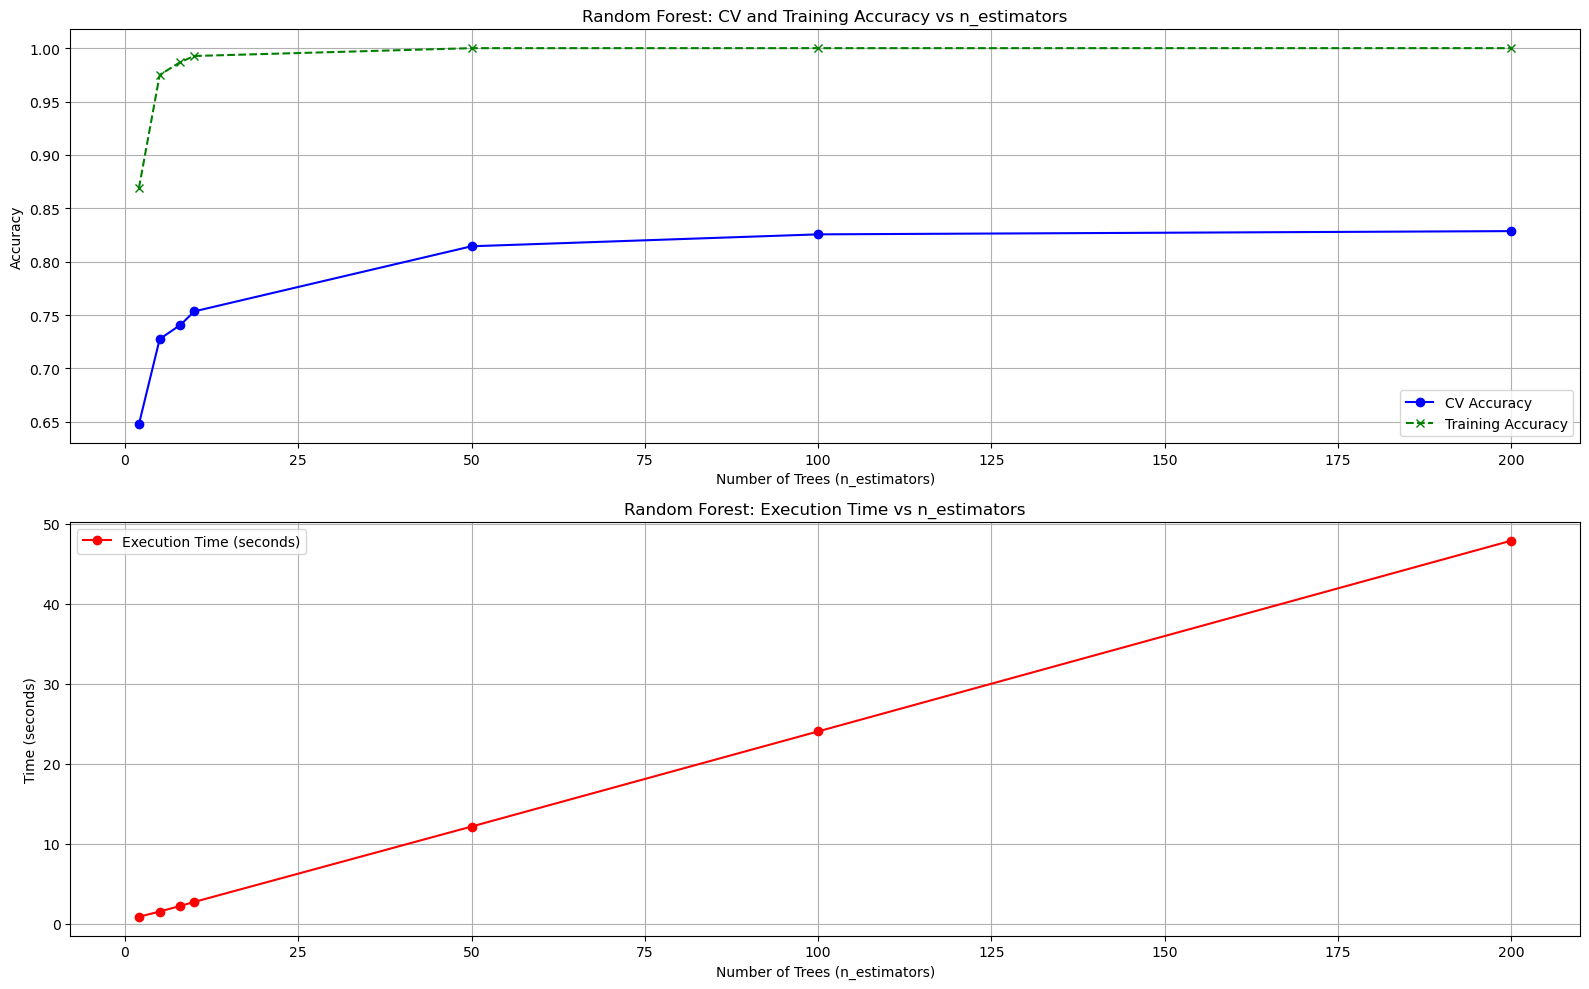

In [22]:
n_estimators = [2, 5, 8, 10, 50, 100, 200]
cv_accuracies = [results_rf[n]['avg_cv_accuracy'] for n in n_estimators]
train_accuracies = [results_rf[n]['avg_train_accuracy'] for n in n_estimators]
execution_times = [results_rf[n]['execution_time'] for n in n_estimators]


plt.figure(figsize=(16, 10))


plt.subplot(2, 1, 1)
plt.plot(n_estimators, cv_accuracies, marker='o', linestyle='-', color='b', label='CV Accuracy')
plt.plot(n_estimators, train_accuracies, marker='x', linestyle='--', color='g', label='Training Accuracy')
plt.title('Random Forest: CV and Training Accuracy vs n_estimators')
plt.xlabel('Number of Trees (n_estimators)')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()


plt.subplot(2, 1, 2)
plt.plot(n_estimators, execution_times, marker='o', linestyle='-', color='r', label='Execution Time (seconds)')
plt.title('Random Forest: Execution Time vs n_estimators')
plt.xlabel('Number of Trees (n_estimators)')
plt.ylabel('Time (seconds)')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

In [25]:
max_depth_values = [2, 5, 7, 10, 20, 40]
results_rf_depth = {}


kf = KFold(n_splits=4, shuffle=True, random_state=42)


for depth in max_depth_values:
    avg_accuracies = []
    avg_train_accuracies = []
    
    start_time = time.time()
    
    for train_index, val_index in kf.split(X_train):
        X_fold_train, X_fold_val = X_train.iloc[train_index], X_train.iloc[val_index]
        y_fold_train, y_fold_val = y_train[train_index], y_train[val_index]

        
        rf = RandomForestClassifier(n_estimators=100, max_depth=depth, random_state=42)  
        rf.fit(X_fold_train, y_fold_train)

        y_val_pred = rf.predict(X_fold_val)
        accuracy = accuracy_score(y_fold_val, y_val_pred)
        avg_accuracies.append(accuracy)

        y_train_pred = rf.predict(X_fold_train)
        train_accuracy = accuracy_score(y_fold_train, y_train_pred)
        avg_train_accuracies.append(train_accuracy)

    avg_cv_accuracy = sum(avg_accuracies) / len(avg_accuracies)
    avg_train_accuracy = sum(avg_train_accuracies) / len(avg_train_accuracies)
    execution_time = time.time() - start_time

    results_rf_depth[depth] = {
        'avg_cv_accuracy': avg_cv_accuracy,
        'avg_train_accuracy': avg_train_accuracy,
        'execution_time': execution_time
    }

    print(f"Random Forest with max_depth={depth}: Average CV accuracy = {avg_cv_accuracy:.4f}, Average Training accuracy = {avg_train_accuracy:.4f}, Time taken = {execution_time:.2f} seconds")

Random Forest with max_depth=2: Average CV accuracy = 0.7704, Average Training accuracy = 0.7722, Time taken = 2.23 seconds
Random Forest with max_depth=5: Average CV accuracy = 0.7910, Average Training accuracy = 0.8038, Time taken = 3.98 seconds
Random Forest with max_depth=7: Average CV accuracy = 0.7984, Average Training accuracy = 0.8232, Time taken = 5.24 seconds
Random Forest with max_depth=10: Average CV accuracy = 0.8071, Average Training accuracy = 0.8578, Time taken = 7.40 seconds
Random Forest with max_depth=20: Average CV accuracy = 0.8169, Average Training accuracy = 0.9483, Time taken = 14.86 seconds
Random Forest with max_depth=40: Average CV accuracy = 0.8227, Average Training accuracy = 0.9965, Time taken = 22.57 seconds


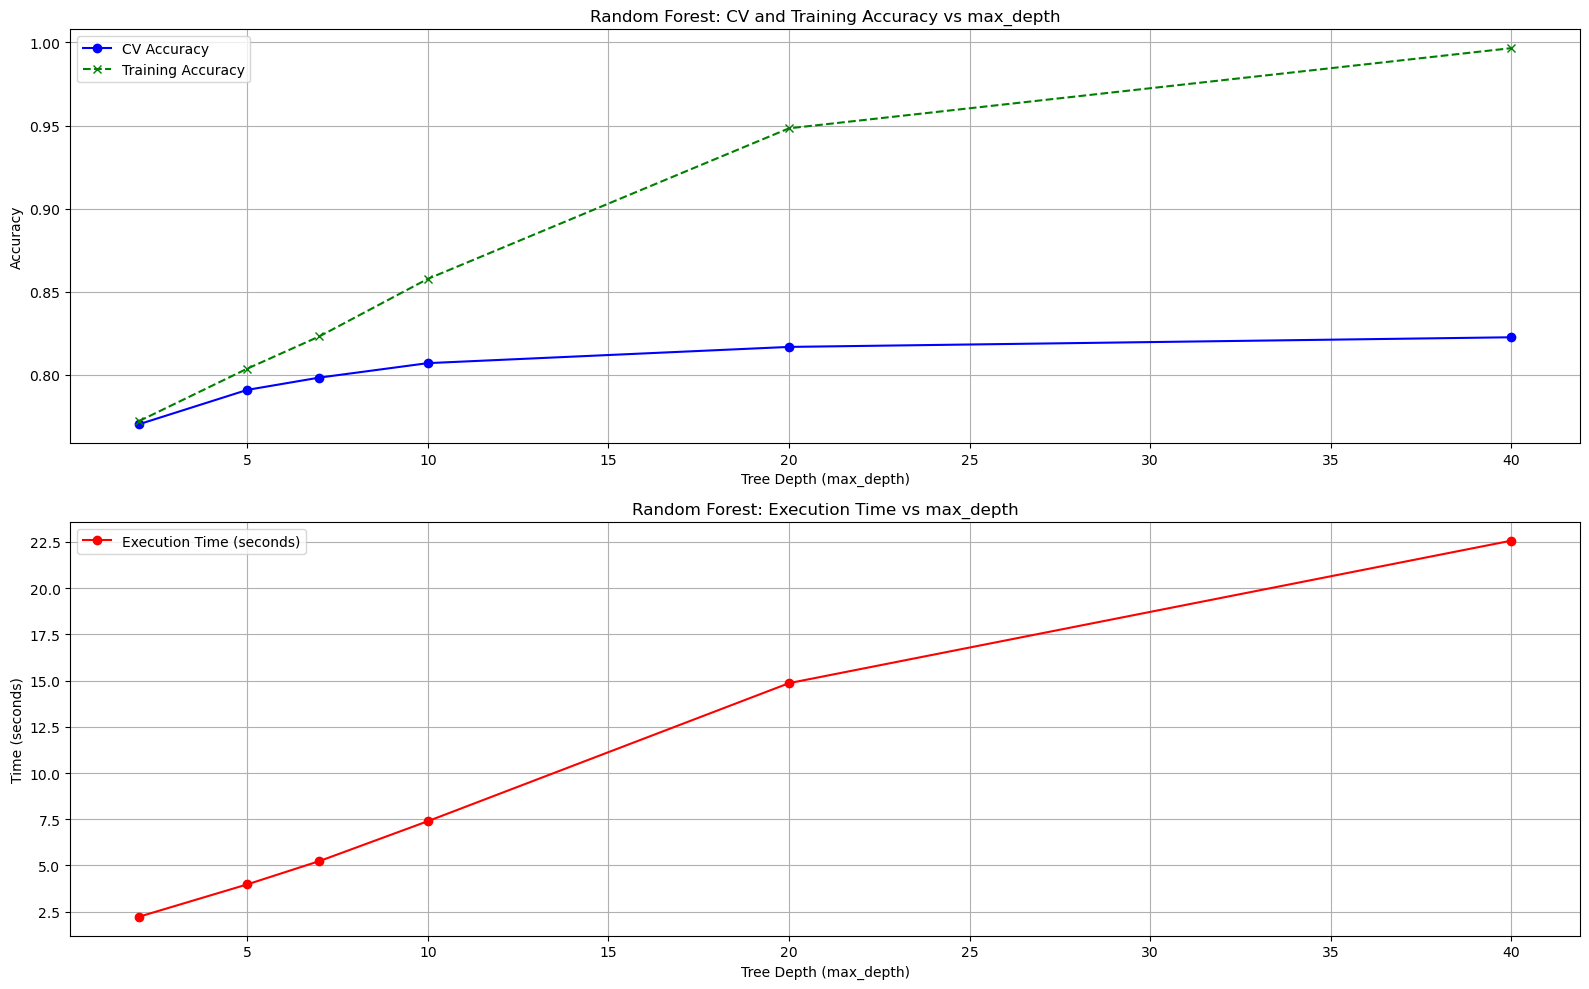

In [26]:

depth_values = [2, 5, 7, 10, 20, 40]
cv_accuracies = [results_rf_depth[depth]['avg_cv_accuracy'] for depth in depth_values]
train_accuracies = [results_rf_depth[depth]['avg_train_accuracy'] for depth in depth_values]
execution_times = [results_rf_depth[depth]['execution_time'] for depth in depth_values]


plt.figure(figsize=(16, 10))


plt.subplot(2, 1, 1)
plt.plot(depth_values, cv_accuracies, marker='o', linestyle='-', color='b', label='CV Accuracy')
plt.plot(depth_values, train_accuracies, marker='x', linestyle='--', color='g', label='Training Accuracy')
plt.title('Random Forest: CV and Training Accuracy vs max_depth')
plt.xlabel('Tree Depth (max_depth)')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()


plt.subplot(2, 1, 2)
plt.plot(depth_values, execution_times, marker='o', linestyle='-', color='r', label='Execution Time (seconds)')
plt.title('Random Forest: Execution Time vs max_depth')
plt.xlabel('Tree Depth (max_depth)')
plt.ylabel('Time (seconds)')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()


Evaluating Random Forest with n_estimators=2
Top 10 Important Features:
     Feature  Importance
249  0.0.178    0.041070
78    0.0.37    0.031219
437  0.0.354    0.022771
87    1.0.42    0.014115
164  0.0.102    0.014010
321  0.0.244    0.011319
357  0.0.279    0.009479
379  0.0.301    0.009210
57    0.0.22    0.008432
338  0.0.260    0.007797


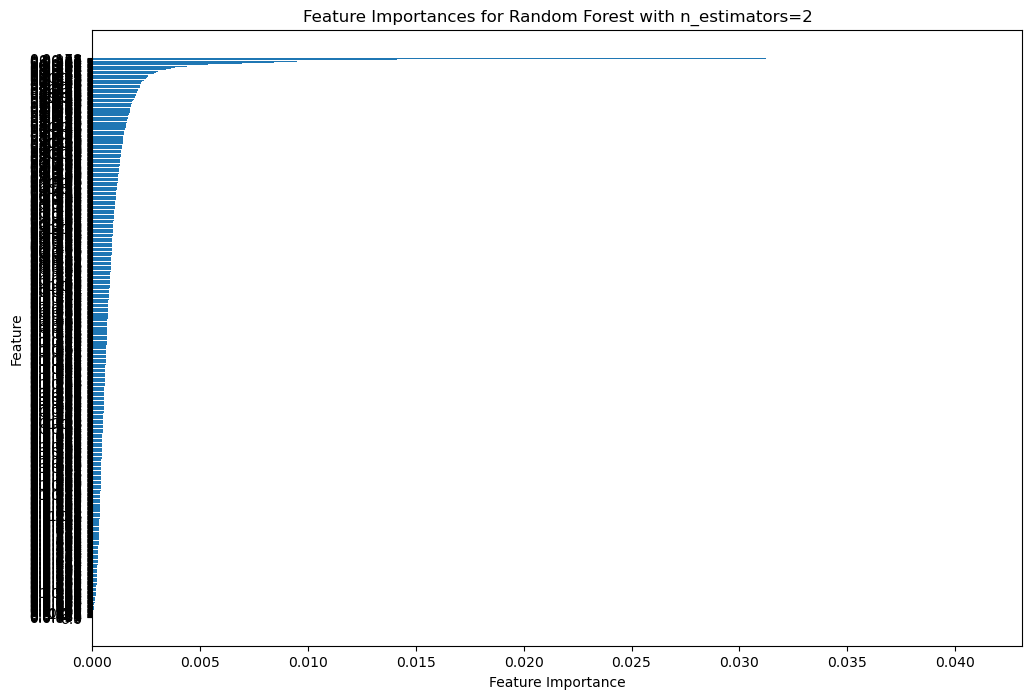


Evaluating Random Forest with n_estimators=5
Top 10 Important Features:
     Feature  Importance
249  0.0.178    0.035291
78    0.0.37    0.026709
437  0.0.354    0.014792
321  0.0.244    0.011060
357  0.0.279    0.011040
87    1.0.42    0.010857
164  0.0.102    0.009605
118   0.0.64    0.008114
338  0.0.260    0.007923
389  0.0.308    0.007922


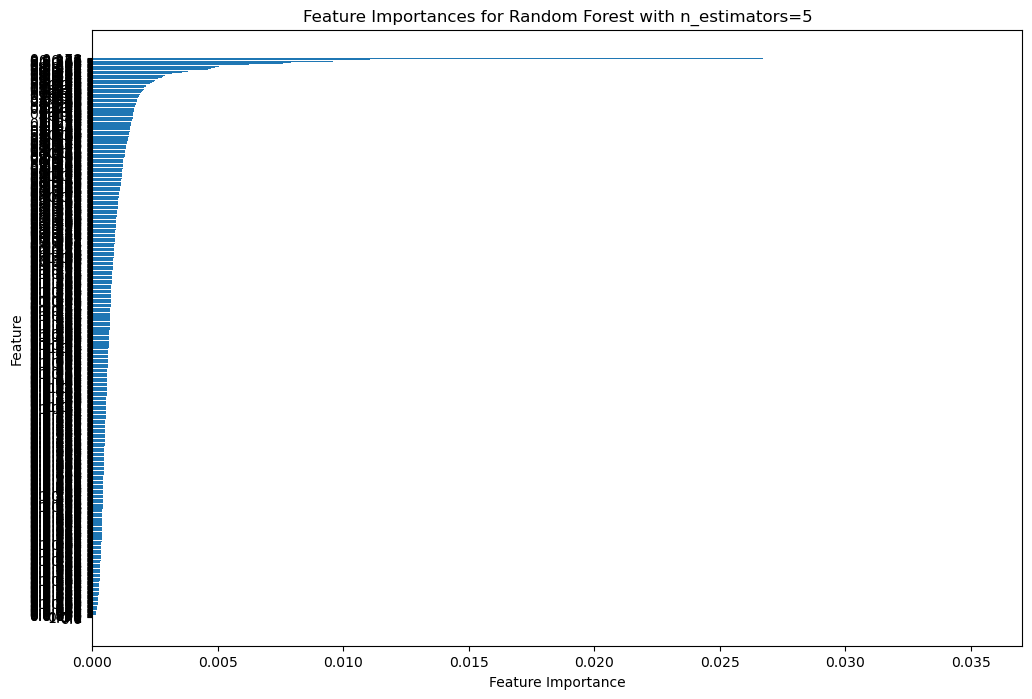


Evaluating Random Forest with n_estimators=8
Top 10 Important Features:
     Feature  Importance
249  0.0.178    0.036805
78    0.0.37    0.023707
437  0.0.354    0.013129
357  0.0.279    0.011130
87    1.0.42    0.010575
321  0.0.244    0.010442
164  0.0.102    0.009973
389  0.0.308    0.007189
338  0.0.260    0.006825
118   0.0.64    0.006725


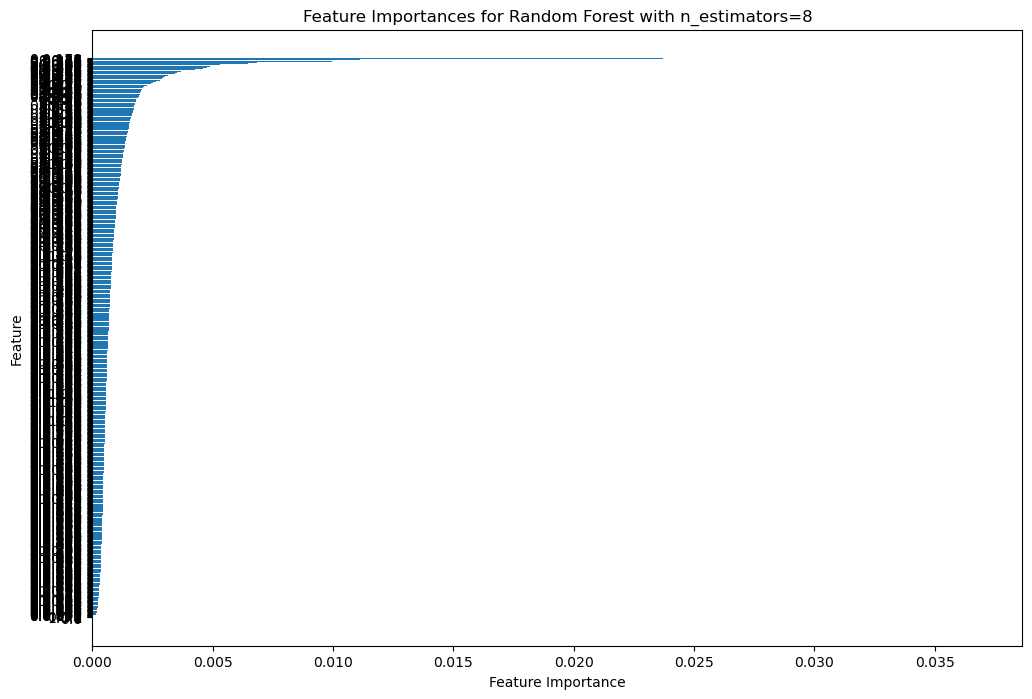


Evaluating Random Forest with n_estimators=10
Top 10 Important Features:
     Feature  Importance
249  0.0.178    0.032936
78    0.0.37    0.021987
437  0.0.354    0.011969
87    1.0.42    0.011631
357  0.0.279    0.011238
164  0.0.102    0.010131
321  0.0.244    0.009528
373  0.0.295    0.008015
57    0.0.22    0.007317
338  0.0.260    0.006742


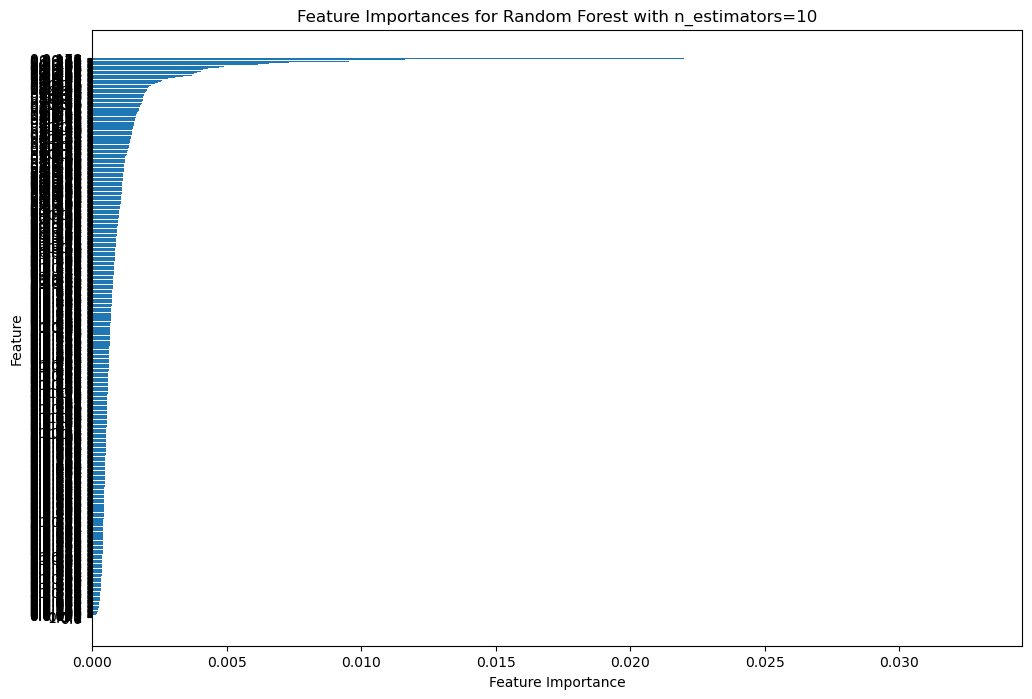


Evaluating Random Forest with n_estimators=50
Top 10 Important Features:
     Feature  Importance
78    0.0.37    0.026654
249  0.0.178    0.026034
437  0.0.354    0.013713
373  0.0.295    0.013003
87    1.0.42    0.011562
321  0.0.244    0.009666
357  0.0.279    0.008499
389  0.0.308    0.007772
164  0.0.102    0.007121
338  0.0.260    0.007022


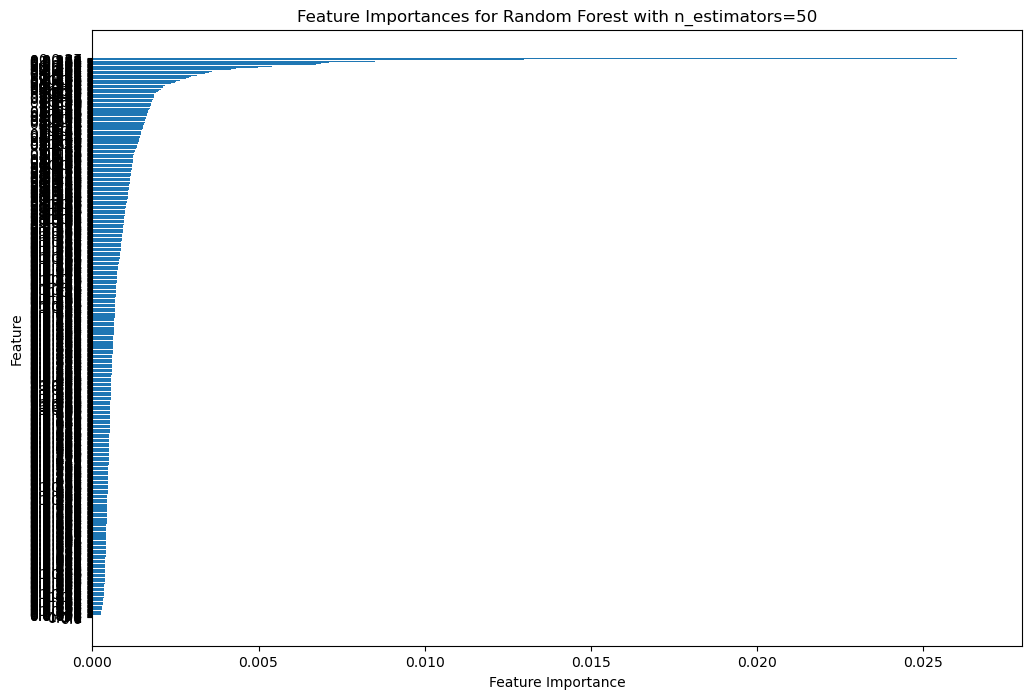


Evaluating Random Forest with n_estimators=100
Top 10 Important Features:
     Feature  Importance
78    0.0.37    0.025920
249  0.0.178    0.025844
373  0.0.295    0.013251
437  0.0.354    0.013141
87    1.0.42    0.012908
321  0.0.244    0.010106
357  0.0.279    0.007639
389  0.0.308    0.007315
164  0.0.102    0.007030
118   0.0.64    0.007025


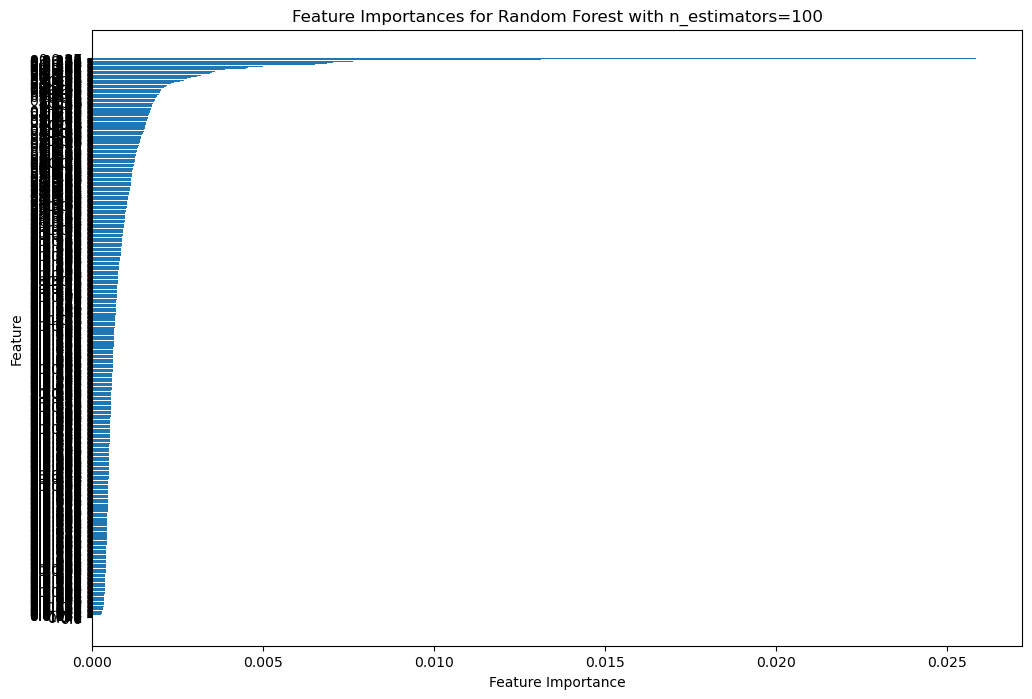


Evaluating Random Forest with n_estimators=200
Top 10 Important Features:
     Feature  Importance
249  0.0.178    0.026428
78    0.0.37    0.023522
87    1.0.42    0.013786
437  0.0.354    0.013431
373  0.0.295    0.013068
321  0.0.244    0.009963
357  0.0.279    0.007752
118   0.0.64    0.007579
57    0.0.22    0.007195
389  0.0.308    0.007175


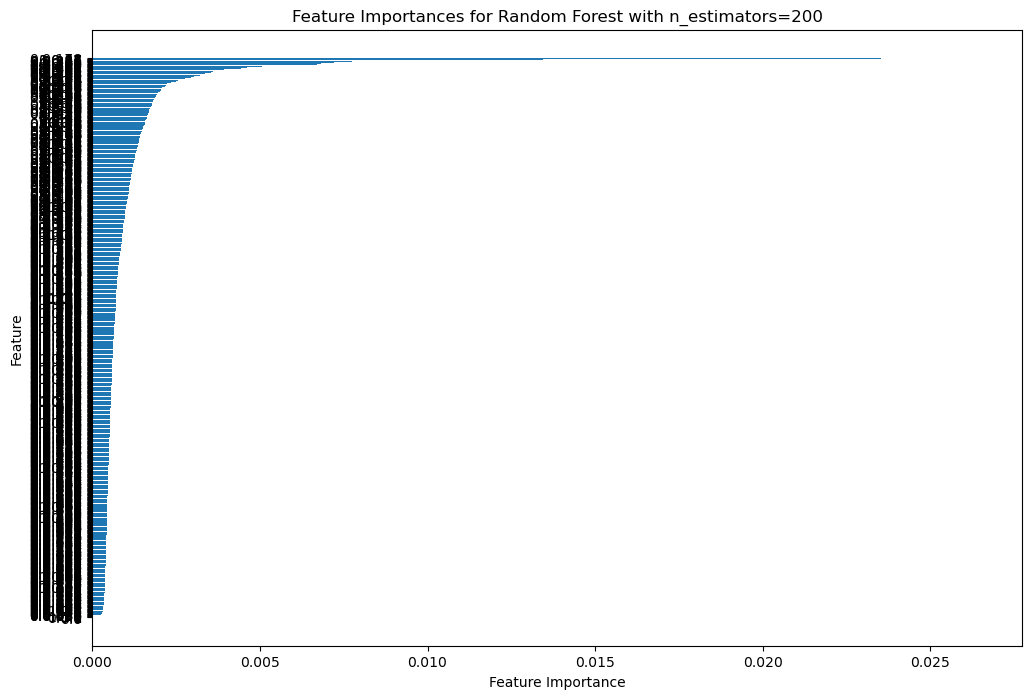

In [28]:
n_estimators = [2, 5, 8, 10, 50, 100, 200]


kf = KFold(n_splits=4, shuffle=True, random_state=42)


for n in n_estimators:
    print(f"\nEvaluating Random Forest with n_estimators={n}")
    
 
    rf = RandomForestClassifier(n_estimators=n, random_state=42)
    rf.fit(X_train, y_train)
    

    feature_importances = rf.feature_importances_

    feature_importances_df = pd.DataFrame({
        'Feature': X_train.columns,
        'Importance': feature_importances
    })


    feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)


    print("Top 10 Important Features:")
    print(feature_importances_df.head(10))

    
    plt.figure(figsize=(12, 8))
    plt.barh(feature_importances_df['Feature'], feature_importances_df['Importance'])
    plt.xlabel('Feature Importance')
    plt.ylabel('Feature')
    plt.title(f'Feature Importances for Random Forest with n_estimators={n}')
    plt.gca().invert_yaxis()  # To display the most important feature at the top
    plt.show()

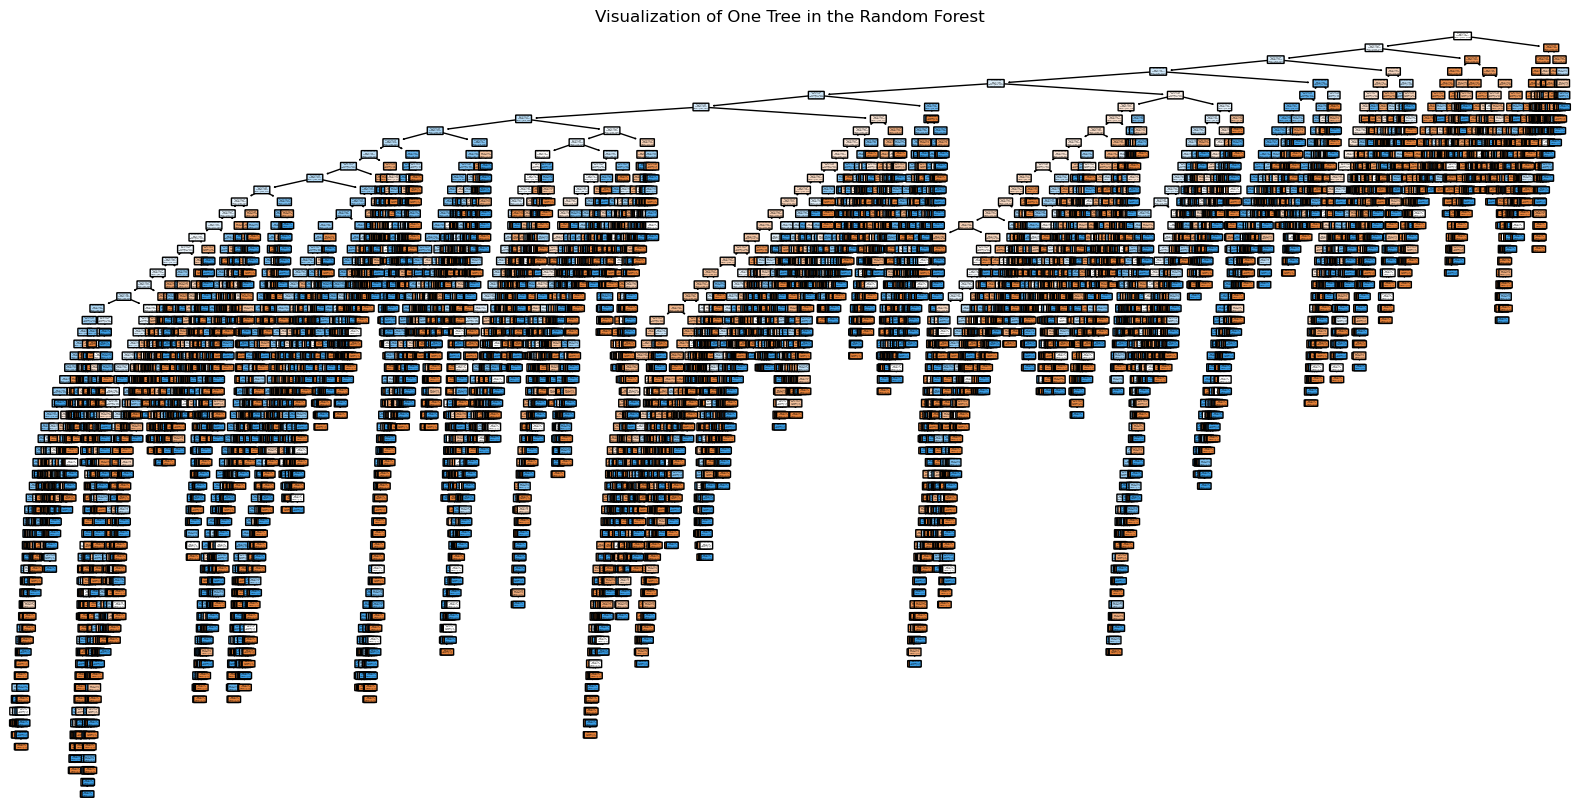

In [23]:
from sklearn.tree import plot_tree


rf = RandomForestClassifier(n_estimators=2, random_state=42)
rf.fit(X_train, y_train)


single_tree = rf.estimators_[0]  
plt.figure(figsize=(20, 10))
plot_tree(single_tree, filled=True, feature_names=X_train.columns, class_names=['Negative', 'Positive'], rounded=True)
plt.title('Visualization of One Tree in the Random Forest')
plt.show()

In [30]:
n_estimators = [2, 5, 8, 50, 100, 200]
max_depth_values = [2, 5, 7]

# KFold cross-validation setup
kf = KFold(n_splits=4, shuffle=True, random_state=42)

# Dictionary to store the results of each combination
combined_results = {}

# Loop through each combination of n_estimators and max_depth
for n in n_estimators:
    for depth in max_depth_values:
        avg_accuracies = []
        avg_train_accuracies = []

        start_time = time.time()

        # Perform cross-validation
        for train_index, val_index in kf.split(X_train):
            X_fold_train, X_fold_val = X_train.iloc[train_index], X_train.iloc[val_index]
            y_fold_train, y_fold_val = y_train[train_index], y_train[val_index]

            # Initialize RandomForest with the current n_estimators and max_depth
            rf = RandomForestClassifier(n_estimators=n, max_depth=depth, random_state=42)
            rf.fit(X_fold_train, y_fold_train)

            # Evaluate on validation data
            y_val_pred = rf.predict(X_fold_val)
            accuracy = accuracy_score(y_fold_val, y_val_pred)
            avg_accuracies.append(accuracy)

            # Evaluate on training data
            y_train_pred = rf.predict(X_fold_train)
            train_accuracy = accuracy_score(y_fold_train, y_train_pred)
            avg_train_accuracies.append(train_accuracy)

        # Calculate average accuracy and training accuracy
        avg_cv_accuracy = sum(avg_accuracies) / len(avg_accuracies)
        avg_train_accuracy = sum(avg_train_accuracies) / len(avg_train_accuracies)
        execution_time = time.time() - start_time

        # Store results in the dictionary
        combined_results[(n, depth)] = {
            'avg_cv_accuracy': avg_cv_accuracy,
            'avg_train_accuracy': avg_train_accuracy,
            'execution_time': execution_time
        }

        print(f"Random Forest with n_estimators={n} and max_depth={depth}: "
              f"Average CV accuracy = {avg_cv_accuracy:.4f}, "
              f"Average Training accuracy = {avg_train_accuracy:.4f}, "
              f"Time taken = {execution_time:.2f} seconds")

Random Forest with n_estimators=2 and max_depth=2: Average CV accuracy = 0.6319, Average Training accuracy = 0.6333, Time taken = 0.49 seconds
Random Forest with n_estimators=2 and max_depth=5: Average CV accuracy = 0.6745, Average Training accuracy = 0.6805, Time taken = 0.40 seconds
Random Forest with n_estimators=2 and max_depth=7: Average CV accuracy = 0.6988, Average Training accuracy = 0.7097, Time taken = 0.42 seconds
Random Forest with n_estimators=5 and max_depth=2: Average CV accuracy = 0.6647, Average Training accuracy = 0.6645, Time taken = 0.42 seconds
Random Forest with n_estimators=5 and max_depth=5: Average CV accuracy = 0.7146, Average Training accuracy = 0.7253, Time taken = 0.50 seconds
Random Forest with n_estimators=5 and max_depth=7: Average CV accuracy = 0.7359, Average Training accuracy = 0.7549, Time taken = 0.57 seconds
Random Forest with n_estimators=8 and max_depth=2: Average CV accuracy = 0.6907, Average Training accuracy = 0.6906, Time taken = 0.47 seconds

In [32]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
import time

# Define the specific values of n_estimators, max_depth, and max_features to test
n_estimators = [100, 200]  # You can adjust this based on your previous experiments
max_depth_values = [2, 5, 7]
max_features_values = [30, 40, 50]  # Set max_features to a range between 30 and 50

# KFold cross-validation setup
kf = KFold(n_splits=4, shuffle=True, random_state=42)

# Dictionary to store the results of each combination
combined_results = {}

# Loop through each combination of n_estimators, max_depth, and max_features
for n in n_estimators:
    for depth in max_depth_values:
        for max_features in max_features_values:
            avg_accuracies = []
            avg_train_accuracies = []

            start_time = time.time()

            # Perform cross-validation
            for train_index, val_index in kf.split(X_train):
                X_fold_train, X_fold_val = X_train.iloc[train_index], X_train.iloc[val_index]
                y_fold_train, y_fold_val = y_train[train_index], y_train[val_index]

                # Initialize RandomForest with current parameters
                rf = RandomForestClassifier(n_estimators=n, max_depth=depth, max_features=max_features, random_state=42)
                rf.fit(X_fold_train, y_fold_train)

                # Evaluate on validation data
                y_val_pred = rf.predict(X_fold_val)
                accuracy = accuracy_score(y_fold_val, y_val_pred)
                avg_accuracies.append(accuracy)

                # Evaluate on training data
                y_train_pred = rf.predict(X_fold_train)
                train_accuracy = accuracy_score(y_fold_train, y_train_pred)
                avg_train_accuracies.append(train_accuracy)

            # Calculate average accuracy and training accuracy
            avg_cv_accuracy = sum(avg_accuracies) / len(avg_accuracies)
            avg_train_accuracy = sum(avg_train_accuracies) / len(avg_train_accuracies)
            execution_time = time.time() - start_time

            # Store results in the dictionary
            combined_results[(n, depth, max_features)] = {
                'avg_cv_accuracy': avg_cv_accuracy,
                'avg_train_accuracy': avg_train_accuracy,
                'execution_time': execution_time
            }

            print(f"Random Forest with n_estimators={n}, max_depth={depth}, max_features={max_features}: "
                  f"Average CV accuracy = {avg_cv_accuracy:.4f}, "
                  f"Average Training accuracy = {avg_train_accuracy:.4f}, "
                  f"Time taken = {execution_time:.2f} seconds")


Random Forest with n_estimators=100, max_depth=2, max_features=30: Average CV accuracy = 0.7683, Average Training accuracy = 0.7704, Time taken = 2.17 seconds
Random Forest with n_estimators=100, max_depth=2, max_features=40: Average CV accuracy = 0.7588, Average Training accuracy = 0.7615, Time taken = 2.40 seconds
Random Forest with n_estimators=100, max_depth=2, max_features=50: Average CV accuracy = 0.7598, Average Training accuracy = 0.7618, Time taken = 2.69 seconds
Random Forest with n_estimators=100, max_depth=5, max_features=30: Average CV accuracy = 0.7899, Average Training accuracy = 0.8018, Time taken = 3.78 seconds
Random Forest with n_estimators=100, max_depth=5, max_features=40: Average CV accuracy = 0.7818, Average Training accuracy = 0.7928, Time taken = 4.59 seconds
Random Forest with n_estimators=100, max_depth=5, max_features=50: Average CV accuracy = 0.7756, Average Training accuracy = 0.7864, Time taken = 5.33 seconds
Random Forest with n_estimators=100, max_depth

Gradient Boosted Regression Trees

In [35]:
# Initialize the dictionary to store results
results_gbrt = {}

# Your existing GBRT cross-validation loop should populate results_gbrt
# The GBRT code block provided earlier is where this dictionary gets filled
for n in n_estimators:
    for lr in learning_rates:
        for depth in max_depth_values:
            avg_accuracies = []
            avg_train_accuracies = []

            start_time = time.time()

            # Cross-validation loop
            for train_index, val_index in kf.split(X_train):
                X_fold_train, X_fold_val = X_train.iloc[train_index], X_train.iloc[val_index]
                y_fold_train, y_fold_val = y_train[train_index], y_train[val_index]

                # Gradient Boosting model with specified parameters
                gbrt = GradientBoostingClassifier(
                    n_estimators=n,
                    learning_rate=lr,
                    max_depth=depth,
                    random_state=42
                )
                gbrt.fit(X_fold_train, y_fold_train)

                # Evaluate model performance
                y_val_pred = gbrt.predict(X_fold_val)
                accuracy = accuracy_score(y_fold_val, y_val_pred)
                avg_accuracies.append(accuracy)

                y_train_pred = gbrt.predict(X_fold_train)
                train_accuracy = accuracy_score(y_fold_train, y_train_pred)
                avg_train_accuracies.append(train_accuracy)

            # Calculate average metrics
            avg_cv_accuracy = sum(avg_accuracies) / len(avg_accuracies)
            avg_train_accuracy = sum(avg_train_accuracies) / len(avg_train_accuracies)
            execution_time = time.time() - start_time

            # Save results to dictionary
            results_gbrt[(n, lr, depth)] = {
                'avg_cv_accuracy': avg_cv_accuracy,
                'avg_train_accuracy': avg_train_accuracy,
                'execution_time': execution_time
            }

            print(f"GBRT with n_estimators={n}, learning_rate={lr}, max_depth={depth}: "
                  f"CV accuracy = {avg_cv_accuracy:.4f}, Training accuracy = {avg_train_accuracy:.4f}, Time = {execution_time:.2f} s")


GBRT with n_estimators=50, learning_rate=0.01, max_depth=2: CV accuracy = 0.6731, Training accuracy = 0.6731, Time = 22.18 s
GBRT with n_estimators=50, learning_rate=0.01, max_depth=3: CV accuracy = 0.6911, Training accuracy = 0.6920, Time = 34.00 s
GBRT with n_estimators=50, learning_rate=0.01, max_depth=5: CV accuracy = 0.7038, Training accuracy = 0.7127, Time = 59.17 s
GBRT with n_estimators=50, learning_rate=0.1, max_depth=2: CV accuracy = 0.7643, Training accuracy = 0.7683, Time = 21.84 s
GBRT with n_estimators=50, learning_rate=0.1, max_depth=3: CV accuracy = 0.7806, Training accuracy = 0.7933, Time = 33.30 s
GBRT with n_estimators=50, learning_rate=0.1, max_depth=5: CV accuracy = 0.8006, Training accuracy = 0.8361, Time = 58.72 s
GBRT with n_estimators=50, learning_rate=0.2, max_depth=2: CV accuracy = 0.7942, Training accuracy = 0.8010, Time = 22.55 s
GBRT with n_estimators=50, learning_rate=0.2, max_depth=3: CV accuracy = 0.8095, Training accuracy = 0.8257, Time = 33.71 s
GBRT 

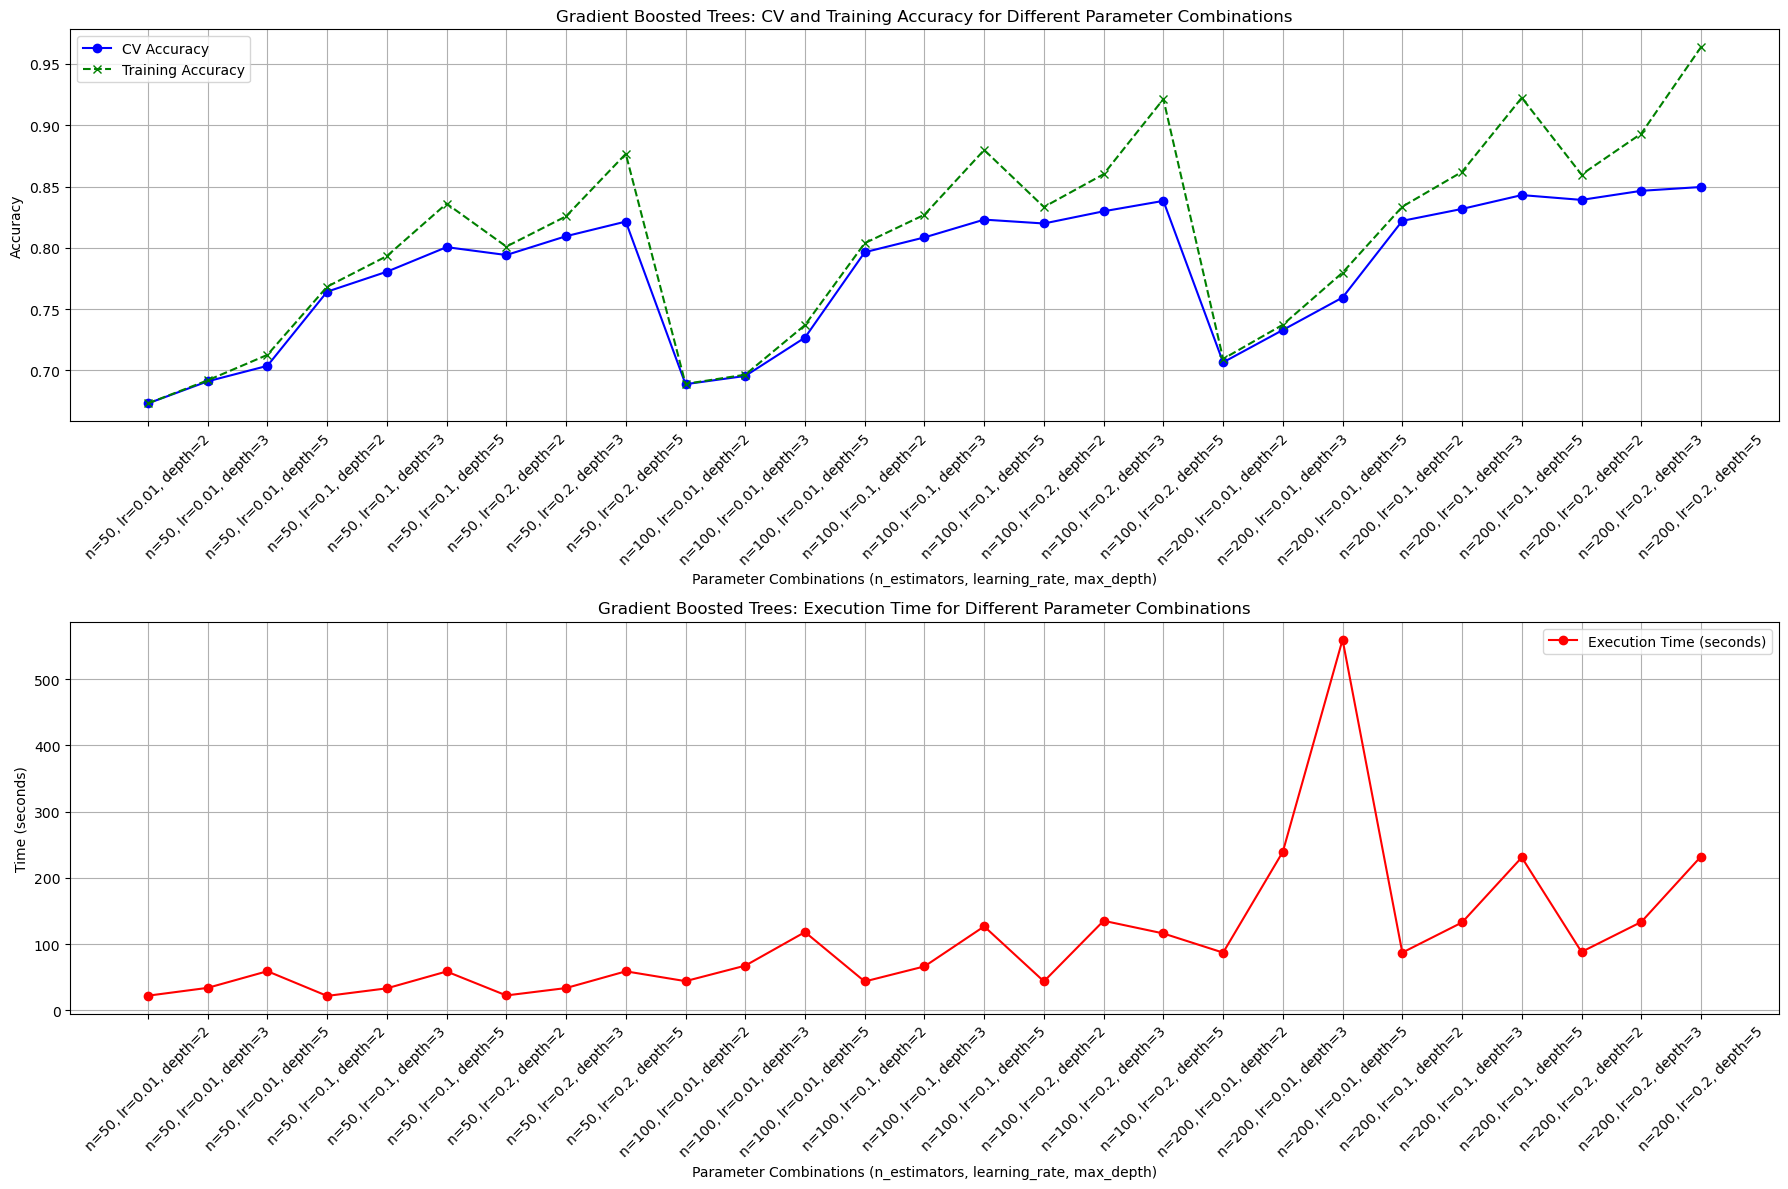

In [36]:
import matplotlib.pyplot as plt

# Prepare lists to collect data for plotting
param_combinations = []
cv_accuracies = []
train_accuracies = []
execution_times = []

# Collect data from the results_gbrt dictionary
for (n, lr, depth), result in results_gbrt.items():
    param_combinations.append(f"n={n}, lr={lr}, depth={depth}")
    cv_accuracies.append(result['avg_cv_accuracy'])
    train_accuracies.append(result['avg_train_accuracy'])
    execution_times.append(result['execution_time'])

# Plotting the accuracies and execution times
plt.figure(figsize=(18, 12))

# Plot Cross-Validation and Training Accuracies
plt.subplot(2, 1, 1)
plt.plot(param_combinations, cv_accuracies, marker='o', linestyle='-', color='b', label='CV Accuracy')
plt.plot(param_combinations, train_accuracies, marker='x', linestyle='--', color='g', label='Training Accuracy')
plt.xticks(rotation=45)
plt.title('Gradient Boosted Trees: CV and Training Accuracy for Different Parameter Combinations')
plt.xlabel('Parameter Combinations (n_estimators, learning_rate, max_depth)')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()

# Plot Execution Times
plt.subplot(2, 1, 2)
plt.plot(param_combinations, execution_times, marker='o', linestyle='-', color='r', label='Execution Time (seconds)')
plt.xticks(rotation=45)
plt.title('Gradient Boosted Trees: Execution Time for Different Parameter Combinations')
plt.xlabel('Parameter Combinations (n_estimators, learning_rate, max_depth)')
plt.ylabel('Time (seconds)')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()


Top 10 Features for Gradient Boosted Trees:
     Feature  Importance
78    0.0.37    0.109952
249  0.0.178    0.084667
87    1.0.42    0.049600
437  0.0.354    0.048665
373  0.0.295    0.039131
321  0.0.244    0.033256
118   0.0.64    0.023326
357  0.0.279    0.022614
389  0.0.308    0.020119
338  0.0.260    0.016724


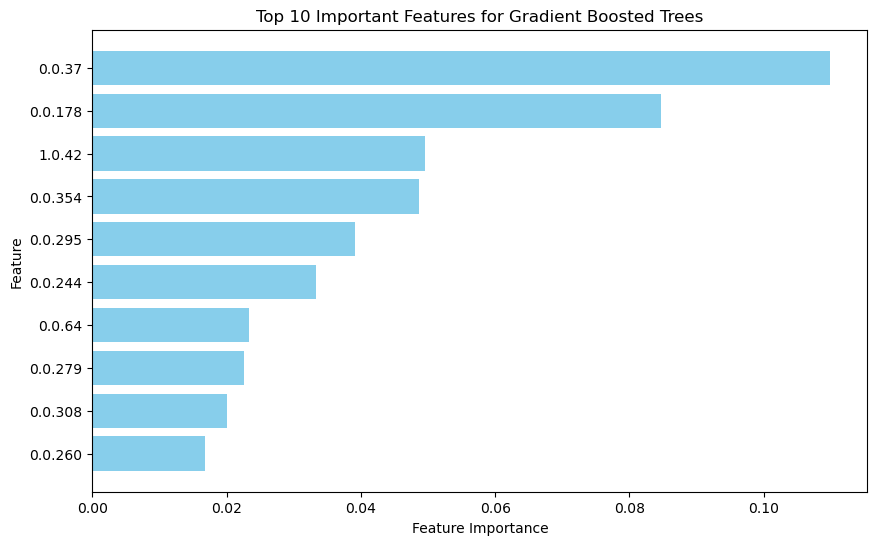

In [57]:
gbrt = GradientBoostingClassifier(n_estimators=200, learning_rate=0.2, max_depth=2, random_state=42)
gbrt.fit(X_train, y_train)

# Extract feature importances
feature_importances = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': gbrt.feature_importances_
})

# Sort the features by importance
top_features = feature_importances.sort_values(by='Importance', ascending=False).head(10)

# Print top 10 features
print("Top 10 Features for Gradient Boosted Trees:")
print(top_features)

# Plot the top 10 features
plt.figure(figsize=(10, 6))
plt.barh(top_features['Feature'], top_features['Importance'], color='skyblue')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Top 10 Important Features for Gradient Boosted Trees')
plt.gca().invert_yaxis()
plt.show()

Top 10 Features for Random Forest:
     Feature  Importance
249  0.0.178    0.084925
373  0.0.295    0.061498
78    0.0.37    0.060393
437  0.0.354    0.040804
321  0.0.244    0.038403
389  0.0.308    0.031080
87    1.0.42    0.026315
357  0.0.279    0.026273
379  0.0.301    0.025534
394  0.0.313    0.025385


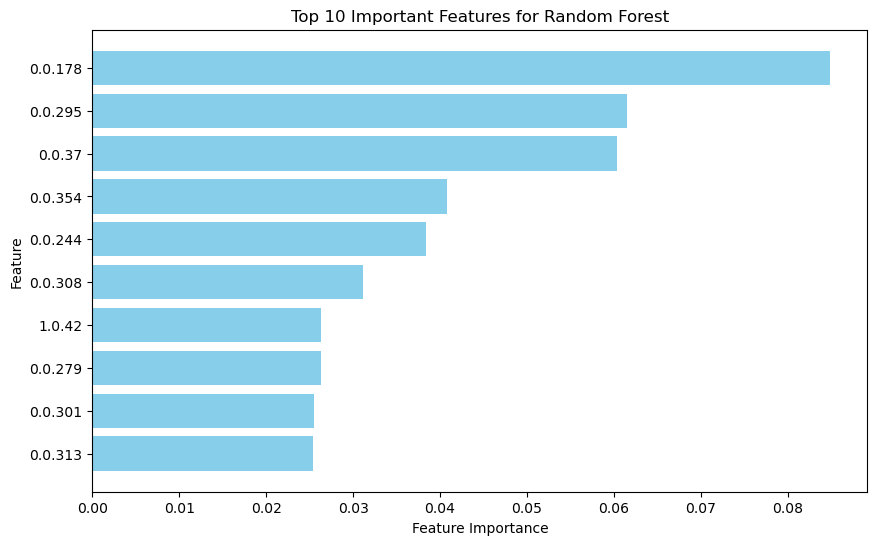

In [58]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import matplotlib.pyplot as plt

# Assuming X_train and y_train are already defined

# Train the Random Forest model
rf = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
rf.fit(X_train, y_train)

# Extract feature importances
feature_importances = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': rf.feature_importances_
})

# Sort the features by importance
top_features = feature_importances.sort_values(by='Importance', ascending=False).head(10)

# Print top 10 features
print("Top 10 Features for Random Forest:")
print(top_features)

# Plot the top 10 features
plt.figure(figsize=(10, 6))
plt.barh(top_features['Feature'], top_features['Importance'], color='skyblue')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Top 10 Important Features for Random Forest')
plt.gca().invert_yaxis()
plt.show()


In [40]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (24999, 1000)
X_test shape: (24999, 1000)
y_train shape: (24999,)
y_test shape: (24999,)


In [41]:
print("Missing values in X_train:", X_train.isnull().sum().sum())
print("Missing values in X_test:", X_test.isnull().sum().sum())
print("Missing values in y_train:", pd.isnull(y_train).sum())
print("Missing values in y_test:", pd.isnull(y_test).sum())

Missing values in X_train: 0
Missing values in X_test: 0
Missing values in y_train: 0
Missing values in y_test: 0


In [49]:
train_columns = X_train.columns
test_columns = X_test.columns

print("Columns in train but not in test:", set(train_columns) - set(test_columns))
print("Columns in test but not in train:", set(test_columns) - set(train_columns))

Columns in train but not in test: {'1.0.46', '1.0.50', '1.0.53', '1.0.76', '1.0.77', '1.0.55', '1.0.85', '1.0.48', '1.0.66', '1.0.84', '1.0.52', '1.0.62', '1.0.79', '1.0.87', '1.0.94', '1.0.64', '1.0.49', '1.0.65', '1.0.56', '1.0.96', '1.0.82', '1.0.44', '1.0.91', '1.0.89', '1.0.74', '1.0.75', '1.0.59', '1.0.93', '1.0.63', '1.0.78', '1.0.81', '1.0.60', '1.0.69', '1.0.45', '1.0.68', '1.0.51', '1.0.43', '1.0.90', '1.0.67', '1.0.73', '1.0.80', '1.0.86', '1.0.83', '1.0.88', '1.0.57', '1.0.92', '1.0.70', '1.0.72', '1.0.42', '1.0.54', '1.0.71', '1.0.58', '1.0.47', '1.0.61', '1.0.95'}
Columns in test but not in train: {'0.0.905', '0.0.923', '0.0.956', '0.0.907', '0.0.954', '0.0.927', '0.0.936', '0.0.932', '0.0.926', '0.0.916', '0.0.924', '0.0.947', '0.0.948', '0.0.912', '0.0.914', '0.0.928', '0.0.918', '0.0.942', '0.0.904', '0.0.953', '0.0.952', '0.0.935', '0.0.945', '0.0.909', '0.0.921', '0.0.938', '0.0.930', '0.0.903', '0.0.934', '0.0.929', '0.0.951', '0.0.941', '0.0.917', '0.0.937', '0.0.9

In [52]:
# Get the columns in training and testing sets
train_columns = X_train.columns
test_columns = X_test.columns

# Find columns unique to train and test
missing_in_test = set(train_columns) - set(test_columns)
missing_in_train = set(test_columns) - set(train_columns)

# Print total missing columns
print(f"Total columns in training set: {len(train_columns)}")
print(f"Total columns in testing set: {len(test_columns)}")
print(f"Columns in train but not in test: {len(missing_in_test)}")
print(f"Columns in test but not in train: {len(missing_in_train)}")

# Display which columns are missing
print("\nMissing columns in test:")
print(missing_in_test)
print("\nMissing columns in train:")
print(missing_in_train)

Total columns in training set: 1000
Total columns in testing set: 1000
Columns in train but not in test: 55
Columns in test but not in train: 55

Missing columns in test:
{'1.0.46', '1.0.50', '1.0.53', '1.0.76', '1.0.77', '1.0.55', '1.0.85', '1.0.48', '1.0.66', '1.0.84', '1.0.52', '1.0.62', '1.0.79', '1.0.87', '1.0.94', '1.0.64', '1.0.49', '1.0.65', '1.0.56', '1.0.96', '1.0.82', '1.0.44', '1.0.91', '1.0.89', '1.0.74', '1.0.75', '1.0.59', '1.0.93', '1.0.63', '1.0.78', '1.0.81', '1.0.60', '1.0.69', '1.0.45', '1.0.68', '1.0.51', '1.0.43', '1.0.90', '1.0.67', '1.0.73', '1.0.80', '1.0.86', '1.0.83', '1.0.88', '1.0.57', '1.0.92', '1.0.70', '1.0.72', '1.0.42', '1.0.54', '1.0.71', '1.0.58', '1.0.47', '1.0.61', '1.0.95'}

Missing columns in train:
{'0.0.905', '0.0.923', '0.0.956', '0.0.907', '0.0.954', '0.0.927', '0.0.936', '0.0.932', '0.0.926', '0.0.916', '0.0.924', '0.0.947', '0.0.948', '0.0.912', '0.0.914', '0.0.928', '0.0.918', '0.0.942', '0.0.904', '0.0.953', '0.0.952', '0.0.935', '0.0.945

In [53]:
common_columns = X_train.columns.intersection(X_test.columns)
X_train_aligned = X_train[common_columns]
X_test_aligned = X_test[common_columns]

Test Run

In [54]:
# 1. K-Nearest Neighbors (KNN)
print("\nTraining and Evaluating KNN...")
start_time = time.time()
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train_aligned, y_train)
knn_train_time = time.time() - start_time

# Training accuracy
knn_train_pred = knn.predict(X_train_aligned)
knn_train_accuracy = accuracy_score(y_train, knn_train_pred)

# Test on test data
start_time = time.time()
knn_test_pred = knn.predict(X_test_aligned)
knn_test_time = time.time() - start_time
knn_test_accuracy = accuracy_score(y_test, knn_test_pred)

print(f"KNN Training Accuracy: {knn_train_accuracy:.4f}")
print(f"KNN Test Accuracy: {knn_test_accuracy:.4f}")
print(f"KNN Training Time: {knn_train_time:.2f} seconds")
print(f"KNN Testing Time: {knn_test_time:.2f} seconds")
print(classification_report(y_test, knn_test_pred))

# 2. Multinomial Naïve Bayes (MNB)
print("\nTraining and Evaluating Multinomial Naïve Bayes...")
start_time = time.time()
mnb = MultinomialNB(alpha=1)
mnb.fit(X_train_aligned, y_train)
mnb_train_time = time.time() - start_time

# Training accuracy
mnb_train_pred = mnb.predict(X_train_aligned)
mnb_train_accuracy = accuracy_score(y_train, mnb_train_pred)

# Test on test data
start_time = time.time()
mnb_test_pred = mnb.predict(X_test_aligned)
mnb_test_time = time.time() - start_time
mnb_test_accuracy = accuracy_score(y_test, mnb_test_pred)

print(f"MNB Training Accuracy: {mnb_train_accuracy:.4f}")
print(f"MNB Test Accuracy: {mnb_test_accuracy:.4f}")
print(f"MNB Training Time: {mnb_train_time:.2f} seconds")
print(f"MNB Testing Time: {mnb_test_time:.2f} seconds")
print(classification_report(y_test, mnb_test_pred))

# 3. Random Forest (RF)
print("\nTraining and Evaluating Random Forest...")
start_time = time.time()
rf = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
rf.fit(X_train_aligned, y_train)
rf_train_time = time.time() - start_time

# Training accuracy
rf_train_pred = rf.predict(X_train_aligned)
rf_train_accuracy = accuracy_score(y_train, rf_train_pred)

# Test on test data
start_time = time.time()
rf_test_pred = rf.predict(X_test_aligned)
rf_test_time = time.time() - start_time
rf_test_accuracy = accuracy_score(y_test, rf_test_pred)

print(f"RF Training Accuracy: {rf_train_accuracy:.4f}")
print(f"RF Test Accuracy: {rf_test_accuracy:.4f}")
print(f"RF Training Time: {rf_train_time:.2f} seconds")
print(f"RF Testing Time: {rf_test_time:.2f} seconds")
print(classification_report(y_test, rf_test_pred))

# 4. Gradient Boosted Regression Trees (GBRT)
print("\nTraining and Evaluating Gradient Boosted Regression Trees...")
start_time = time.time()
gbrt = GradientBoostingClassifier(n_estimators=200, learning_rate=0.2, max_depth=2, random_state=42)
gbrt.fit(X_train_aligned, y_train)
gbrt_train_time = time.time() - start_time

# Training accuracy
gbrt_train_pred = gbrt.predict(X_train_aligned)
gbrt_train_accuracy = accuracy_score(y_train, gbrt_train_pred)

# Test on test data
start_time = time.time()
gbrt_test_pred = gbrt.predict(X_test_aligned)
gbrt_test_time = time.time() - start_time
gbrt_test_accuracy = accuracy_score(y_test, gbrt_test_pred)

print(f"GBRT Training Accuracy: {gbrt_train_accuracy:.4f}")
print(f"GBRT Test Accuracy: {gbrt_test_accuracy:.4f}")
print(f"GBRT Training Time: {gbrt_train_time:.2f} seconds")
print(f"GBRT Testing Time: {gbrt_test_time:.2f} seconds")
print(classification_report(y_test, gbrt_test_pred))

# Compare Models
print("\nFinal Model Comparison:")
print(f"KNN - Train Accuracy: {knn_train_accuracy:.4f}, Test Accuracy: {knn_test_accuracy:.4f}, Train Time: {knn_train_time:.2f}s, Test Time: {knn_test_time:.2f}s")
print(f"MNB - Train Accuracy: {mnb_train_accuracy:.4f}, Test Accuracy: {mnb_test_accuracy:.4f}, Train Time: {mnb_train_time:.2f}s, Test Time: {mnb_test_time:.2f}s")
print(f"RF - Train Accuracy: {rf_train_accuracy:.4f}, Test Accuracy: {rf_test_accuracy:.4f}, Train Time: {rf_train_time:.2f}s, Test Time: {rf_test_time:.2f}s")
print(f"GBRT - Train Accuracy: {gbrt_train_accuracy:.4f}, Test Accuracy: {gbrt_test_accuracy:.4f}, Train Time: {gbrt_train_time:.2f}s, Test Time: {gbrt_test_time:.2f}s")


Training and Evaluating KNN...
KNN Training Accuracy: 0.7281
KNN Test Accuracy: 0.4975
KNN Training Time: 0.09 seconds
KNN Testing Time: 6.34 seconds
              precision    recall  f1-score   support

         0.0       0.49      0.18      0.27     12499
         1.0       0.50      0.81      0.62     12500

    accuracy                           0.50     24999
   macro avg       0.50      0.50      0.44     24999
weighted avg       0.50      0.50      0.44     24999


Training and Evaluating Multinomial Naïve Bayes...
MNB Training Accuracy: 0.8312
MNB Test Accuracy: 0.4959
MNB Training Time: 0.02 seconds
MNB Testing Time: 0.03 seconds
              precision    recall  f1-score   support

         0.0       0.50      0.46      0.48     12499
         1.0       0.50      0.53      0.51     12500

    accuracy                           0.50     24999
   macro avg       0.50      0.50      0.50     24999
weighted avg       0.50      0.50      0.50     24999


Training and Evaluating

In [59]:
feature_names = X_test_aligned.columns

# 1. Random Forest Top Features
print("\nTop 10 Features for test Random Forest:")
rf_feature_importances = rf.feature_importances_
rf_top_features = np.argsort(rf_feature_importances)[-10:][::-1]  # Get indices of top 10 features
for idx in rf_top_features:
    print(f"Feature: {feature_names[idx]}, Importance: {rf_feature_importances[idx]:.4f}")

# 2. Gradient Boosted Trees Top Features
print("\nTop 10 Features for test Gradient Boosted Trees:")
gbrt_feature_importances = gbrt.feature_importances_
gbrt_top_features = np.argsort(gbrt_feature_importances)[-10:][::-1]  # Get indices of top 10 features
for idx in gbrt_top_features:
    print(f"Feature: {feature_names[idx]}, Importance: {gbrt_feature_importances[idx]:.4f}")


Top 10 Features for test Random Forest:
Feature: 0.0.207, Importance: 0.0849
Feature: 0.0.331, Importance: 0.0615
Feature: 0.0.37, Importance: 0.0604
Feature: 0.0.395, Importance: 0.0408
Feature: 0.0.279, Importance: 0.0384
Feature: 0.0.347, Importance: 0.0311
Feature: 0.0.45, Importance: 0.0263
Feature: 0.0.315, Importance: 0.0263
Feature: 0.0.337, Importance: 0.0255
Feature: 0.0.352, Importance: 0.0254

Top 10 Features for test Gradient Boosted Trees:
Feature: 0.0.37, Importance: 0.1100
Feature: 0.0.207, Importance: 0.0847
Feature: 0.0.45, Importance: 0.0496
Feature: 0.0.395, Importance: 0.0487
Feature: 0.0.331, Importance: 0.0391
Feature: 0.0.279, Importance: 0.0333
Feature: 0.0.76, Importance: 0.0233
Feature: 0.0.315, Importance: 0.0226
Feature: 0.0.347, Importance: 0.0201
Feature: 0.0.296, Importance: 0.0167
